In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

Mounted at /content/gdrive


#Part 1: Data Characterization

In [ ]:
#1.1

#download data
#3D
input_data_3D_og = pd.read_csv("/content/gdrive/My Drive/Class Assignments/ENGN 2350 Assignments/final_project_data/supercompressible_3d_input.csv")
input_data_3D_og = input_data_3D_og[['ratio_pitch','ratio_d','ratio_top_diameter']]
output_data_3D_og = pd.read_csv("/content/gdrive/My Drive/Class Assignments/ENGN 2350 Assignments/final_project_data/supercompressible_3d_output.csv")
output_data_3D_og = output_data_3D_og[['coilable','sigma_crit','energy']]
full_data_3D_og = pd.concat([input_data_3D_og,output_data_3D_og],axis=1) #combining input and output data into one dataframe

#7D
input_data_7D_og = pd.read_csv("/content/gdrive/My Drive/Class Assignments/ENGN 2350 Assignments/final_project_data/supercompressible_7d_input.csv")
input_data_7D_og = input_data_7D_og[['ratio_area','ratio_Ixx','ratio_Iyy','ratio_J','ratio_pitch','ratio_top_diameter','ratio_shear_modulus']]
output_data_7D_og = pd.read_csv("/content/gdrive/My Drive/Class Assignments/ENGN 2350 Assignments/final_project_data/supercompressible_7d_output.csv")
output_data_7D_og = output_data_7D_og[['coilable','sigma_crit','energy']]
full_data_7D_og = pd.concat([input_data_7D_og,output_data_7D_og],axis=1) #combining input and output data into one dataframe

#finding maximum and minimum
print('3D maximum values')
maxValues3D = full_data_3D_og.max()
print(maxValues3D)
print('3D minimum values')
minValues3D = full_data_3D_og.min()
print(minValues3D)

print('7D maximum values')
maxValues7D = full_data_7D_og.max()
print(maxValues7D)
print('7D minimum values')
minValues7D = full_data_7D_og.min()
print(minValues7D)

3D maximum values
ratio_pitch             1.498779
ratio_d                 0.072933
ratio_top_diameter      0.799219
coilable                2.000000
sigma_crit            143.264914
energy                 73.917332
dtype: float64
3D minimum values
ratio_pitch           0.250000
ratio_d               0.004000
ratio_top_diameter    0.000000
coilable              0.000000
sigma_crit            0.000494
energy                0.000280
dtype: float64
7D maximum values
ratio_area                0.004100
ratio_Ixx                 0.000001
ratio_Iyy                 0.000001
ratio_J                   0.000008
ratio_pitch               1.499981
ratio_top_diameter        0.799976
ratio_shear_modulus       0.449987
coilable                  1.000000
sigma_crit              195.938834
energy                 5136.797780
dtype: float64
7D minimum values
ratio_area             1.170000e-05
ratio_Ixx              1.128000e-11
ratio_Iyy              1.128000e-11
ratio_J                1.353000e-11
ratio

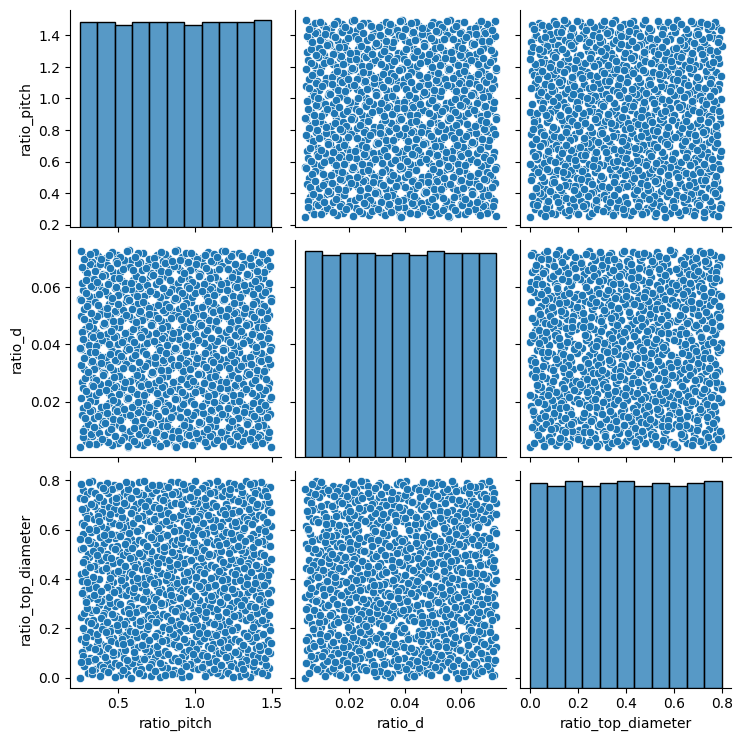

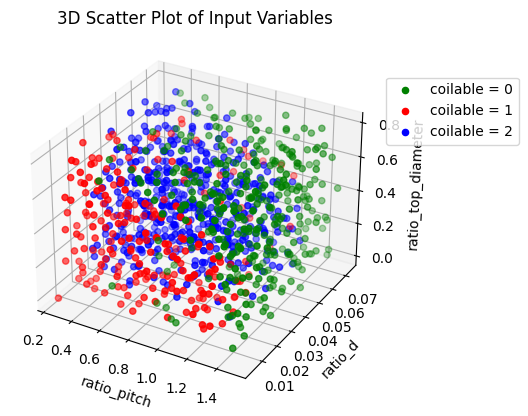

In [ ]:
#scatterplots of input variables, all points
sns.pairplot(input_data_3D_og)

# Create a 3D scatter plot for columns 2 to 4
colors = {0: 'green', 1: 'red', 2: 'blue'}
fig_input_3d = plt.figure()
ax_input_3d = fig_input_3d.add_subplot(111, projection='3d')
for label, color in colors.items():
    mask = (output_data_3D_og['coilable'] == label)
    ax_input_3d.scatter(input_data_3D_og.loc[mask, 'ratio_pitch'], input_data_3D_og.loc[mask, 'ratio_d'],
                  input_data_3D_og.loc[mask, 'ratio_top_diameter'], label=f'coilable = {label}', color=color)
ax_input_3d.set_title('3D Scatter Plot of Input Variables')
ax_input_3d.set_xlabel('ratio_pitch')
ax_input_3d.set_ylabel('ratio_d')
ax_input_3d.set_zlabel('ratio_top_diameter')
fig_input_3d.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))
plt.show()

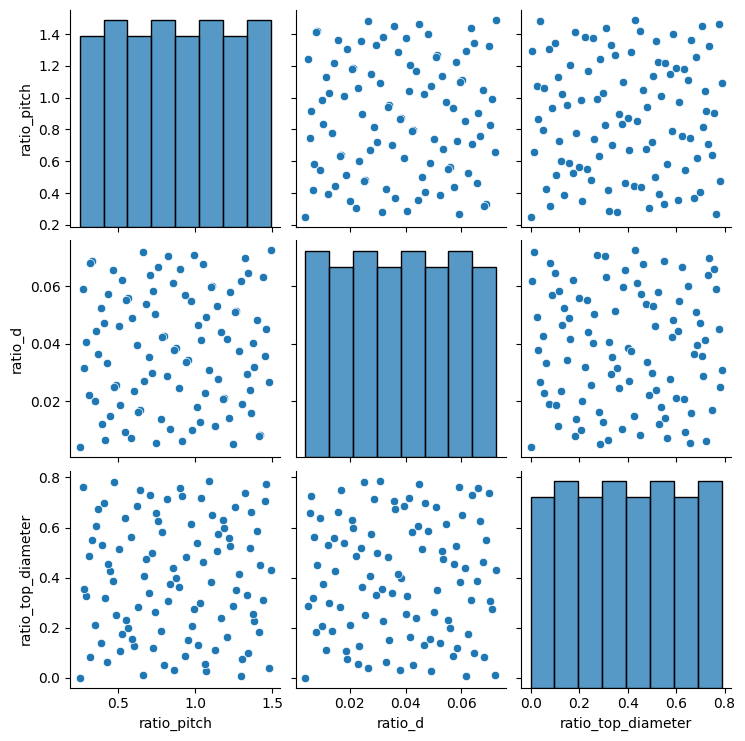

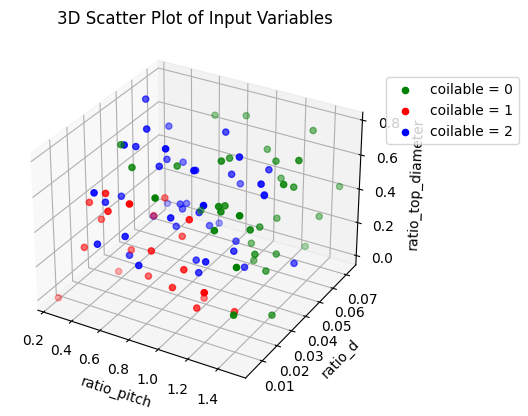

In [ ]:
#1.2
full_data_3D_first100 = full_data_3D_og.head(100) #choosing first 100 points of dataframe

#divide dataframe into input and output
input_data_3D_first100 = full_data_3D_first100[['ratio_pitch','ratio_d','ratio_top_diameter']]
output_data_3D_first100 = full_data_3D_first100[['coilable','sigma_crit','energy']]

#scatterplots of input variables
sns.pairplot(input_data_3D_first100)

# Create a 3D scatter plot for columns 2 to 4
colors = {0: 'green', 1: 'red', 2: 'blue'}
fig_input_3d = plt.figure()
ax_input_3d = fig_input_3d.add_subplot(111, projection='3d')
for label, color in colors.items():
    mask = (output_data_3D_first100['coilable'] == label)
    ax_input_3d.scatter(input_data_3D_first100.loc[mask, 'ratio_pitch'], input_data_3D_first100.loc[mask, 'ratio_d'],
                  input_data_3D_first100.loc[mask, 'ratio_top_diameter'], label=f'coilable = {label}', color=color)
ax_input_3d.set_title('3D Scatter Plot of Input Variables')
ax_input_3d.set_xlabel('ratio_pitch')
ax_input_3d.set_ylabel('ratio_d')
ax_input_3d.set_zlabel('ratio_top_diameter')
fig_input_3d.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))
plt.show()

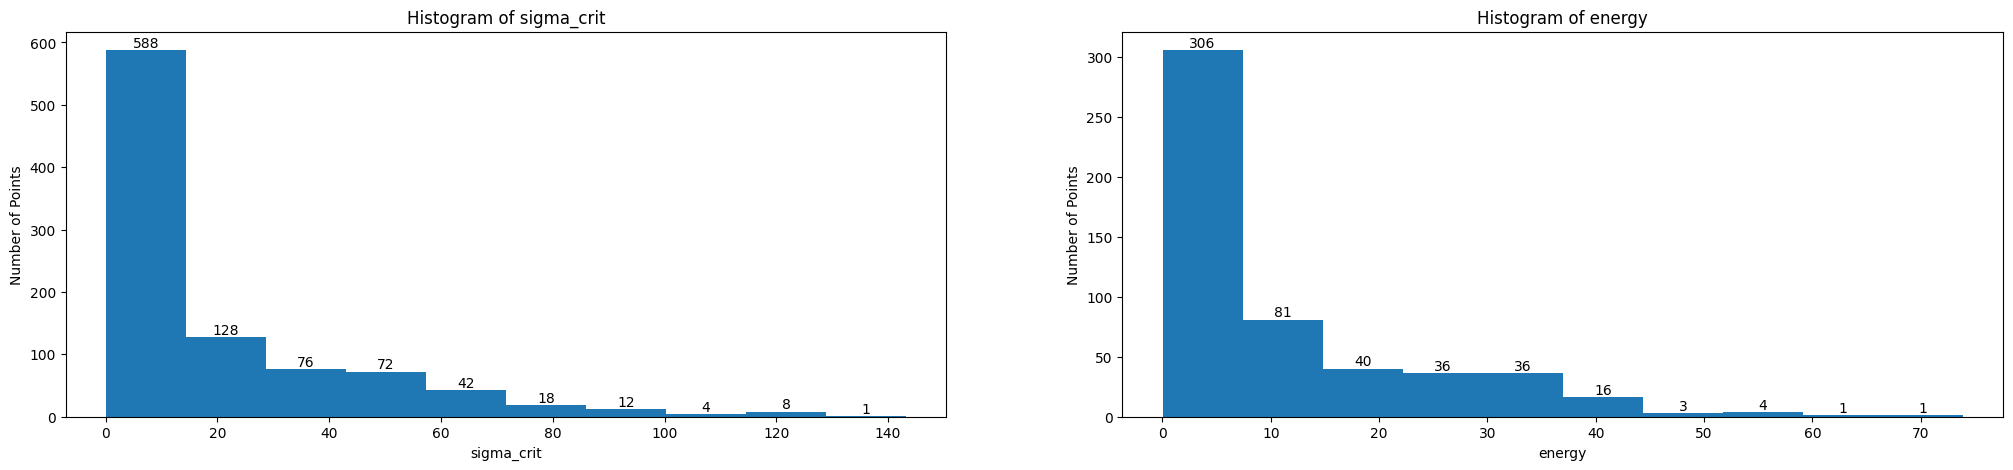

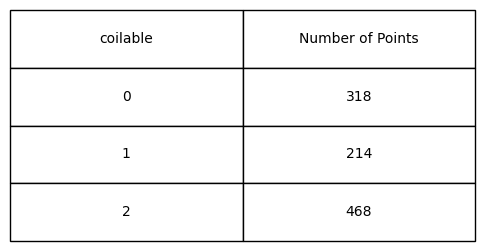

In [ ]:
#1.3
#3D
#histograms of output variables
fig_outputHist, (ax_outputHist1,ax_outputHist2) = plt.subplots(1,2)
fig_outputHist.set_size_inches(25, 5) # scale figure to be wider (since there are 2 subplots)
values1, bins1, bars1 = ax_outputHist1.hist(output_data_3D_og['sigma_crit'])
values2, bins2, bars2 = ax_outputHist2.hist(output_data_3D_og['energy'])
ax_outputHist1.set_title('Histogram of sigma_crit')
ax_outputHist2.set_title('Histogram of energy')
ax_outputHist1.set_xlabel('sigma_crit')
ax_outputHist2.set_xlabel('energy')
ax_outputHist1.set_ylabel('Number of Points')
ax_outputHist2.set_ylabel('Number of Points')
ax_outputHist1.bar_label(bars1)
ax_outputHist2.bar_label(bars2)

#table of coilabe output variable
coilable_counts = output_data_3D_og['coilable'].value_counts()
coilable_table = pd.DataFrame({'coilable': coilable_counts.index, 'Number of Points': coilable_counts.values})

# Sort the table based on 'coilable' values
coilable_table = coilable_table.sort_values(by='coilable').reset_index(drop=True)

# Plot the table
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')  # Hide axes
table = ax.table(cellText=coilable_table.values,
                 colLabels=coilable_table.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])  # Adjust bbox as needed

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.show()

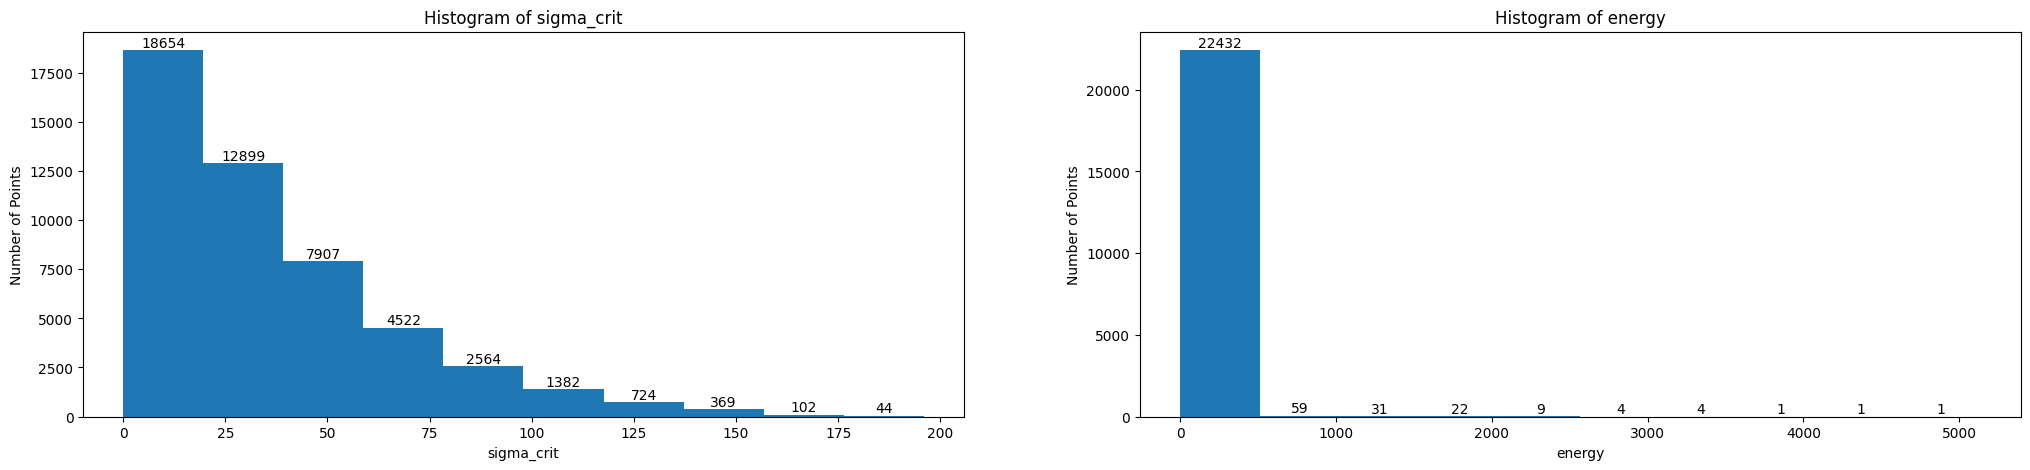

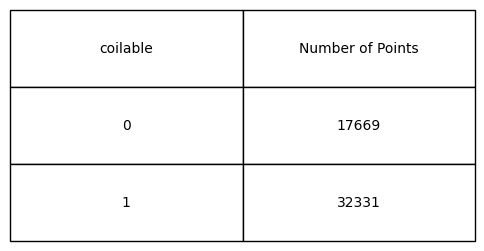

In [ ]:
#7D
#histograms of output variables
fig_outputHist, (ax_outputHist1,ax_outputHist2) = plt.subplots(1,2)
fig_outputHist.set_size_inches(25, 5) # scale figure to be wider (since there are 2 subplots)
values1, bins1, bars1 = ax_outputHist1.hist(output_data_7D_og['sigma_crit'])
values2, bins2, bars2 = ax_outputHist2.hist(output_data_7D_og['energy'])
ax_outputHist1.set_title('Histogram of sigma_crit')
ax_outputHist2.set_title('Histogram of energy')
ax_outputHist1.set_xlabel('sigma_crit')
ax_outputHist2.set_xlabel('energy')
ax_outputHist1.set_ylabel('Number of Points')
ax_outputHist2.set_ylabel('Number of Points')
ax_outputHist1.bar_label(bars1)
ax_outputHist2.bar_label(bars2)

#table of coilabe output variable
coilable_counts = output_data_7D_og['coilable'].value_counts()
coilable_table = pd.DataFrame({'coilable': coilable_counts.index, 'Number of Points': coilable_counts.values})

# Sort the table based on 'coilable' values
coilable_table = coilable_table.sort_values(by='coilable').reset_index(drop=True)

# Plot the table
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')  # Hide axes
table = ax.table(cellText=coilable_table.values,
                 colLabels=coilable_table.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])  # Adjust bbox as needed

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.show()

In [ ]:
#1.4 finding maximum points before imputation and outliers
filtered_df = full_data_3D_og[full_data_3D_og['coilable'] == 1].dropna()
maxSigmaCrit = filtered_df.loc[filtered_df['sigma_crit'].idxmax()]
maxEnergy = filtered_df.loc[filtered_df['energy'].idxmax()]
print('Point with maximum sigma_crit')
print(maxSigmaCrit)
print('Point with maximum energy')
print(maxEnergy)

Point with maximum sigma_crit
ratio_pitch           0.278076
ratio_d               0.035063
ratio_top_diameter    0.724219
coilable              1.000000
sigma_crit            6.803301
energy                3.635225
Name: 884, dtype: float64
Point with maximum energy
ratio_pitch           0.320801
ratio_d               0.033783
ratio_top_diameter    0.757812
coilable              1.000000
sigma_crit            6.735183
energy                3.732142
Name: 420, dtype: float64


In [ ]:
#outliers and NaN values
from sklearn.impute import KNNImputer

#fill in missing values
imputer = KNNImputer(n_neighbors=5) # Create a KNNImputer instance
output_data_3D = pd.DataFrame(imputer.fit_transform(output_data_3D_og), columns=output_data_3D_og.columns) # Impute missing values
#output_data_7D = pd.DataFrame(imputer.fit_transform(output_data_7D_og), columns=output_data_7D_og.columns) # Impute missing values

#3D
full_data_3D = pd.concat([input_data_3D_og,output_data_3D],axis=1)
full_data_3D = full_data_3D[(np.abs(stats.zscore(full_data_3D['sigma_crit'])) < 3)] #removing sigma_crit outliers (more than 3 standard deviations)
full_data_3D = full_data_3D[(np.abs(stats.zscore(full_data_3D['energy'])) < 3)] #removing energy outliers (more than 3 standard deviations)
full_data_3D = full_data_3D.reset_index(drop=True) #reindexing data
input_data_3D = full_data_3D[['ratio_pitch','ratio_d','ratio_top_diameter']]
output_data_3D = full_data_3D[['coilable','sigma_crit','energy']]

#7D
#full_data_7D = pd.concat([input_data_7D_og,output_data_7D],axis=1) #combining input and output data (with imputed values) into one dataframe
#full_data_7D = full_data_7D[(np.abs(stats.zscore(full_data_7D['sigma_crit'])) < 3)] #removing sigma_crit outliers (more than 3 standard deviations)
#full_data_7D = full_data_7D[(np.abs(stats.zscore(full_data_7D['energy'])) < 3)] #removing energy outliers (more than 3 standard deviations)
#full_data_7D = full_data_7D.reset_index(drop=True) #reindexing data
#input_data_7D = full_data_7D[['ratio_area','ratio_Ixx','ratio_Iyy','ratio_J','ratio_pitch','ratio_top_diameter','ratio_shear_modulus']]
#output_data_7D = full_data_7D[['coilable','sigma_crit','energy']]

In [ ]:
#1.4 finding maximum points after imputation and outliers
filtered_df_after = full_data_3D[full_data_3D['coilable'] == 1]
maxSigmaCrit = filtered_df_after.loc[filtered_df_after['sigma_crit'].idxmax()]
maxEnergy = filtered_df_after.loc[filtered_df_after['energy'].idxmax()]
print('Point with maximum sigma_crit')
print(maxSigmaCrit)
print('Point with maximum energy')
print(maxEnergy)

Point with maximum sigma_crit
ratio_pitch            0.885986
ratio_d                0.067272
ratio_top_diameter     0.557031
coilable               1.000000
sigma_crit            81.335815
energy                44.821422
Name: 593, dtype: float64
Point with maximum energy
ratio_pitch            0.885986
ratio_d                0.067272
ratio_top_diameter     0.557031
coilable               1.000000
sigma_crit            81.335815
energy                44.821422
Name: 593, dtype: float64


#Part 2: Finding good machine learning models

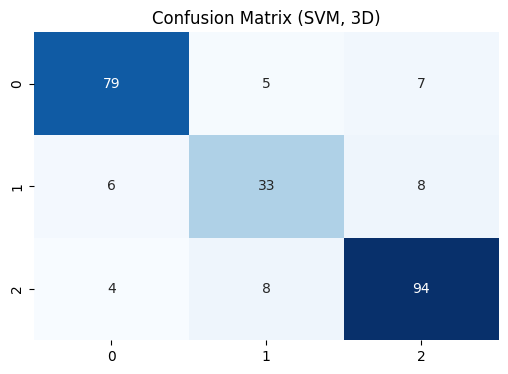

[[79  5  7]
 [ 6 33  8]
 [ 4  8 94]]
[0. 0. 0. 2. 2. 1. 2. 2. 1. 0. 0. 2. 0. 2. 1. 1. 1. 2. 1. 2. 0. 2. 0. 2.
 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 1. 0. 0. 0. 2. 0. 2. 2. 1. 2. 2. 2. 2.
 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 0. 2. 2. 1. 1. 1. 2. 2. 0. 0. 2. 1. 2. 2.
 2. 2. 0. 0. 0. 2. 0. 2. 0. 2. 0. 0. 2. 2. 1. 0. 1. 2. 0. 1. 2. 2. 0. 1.
 0. 2. 2. 0. 2. 2. 2. 2. 2. 0. 1. 0. 0. 2. 0. 2. 0. 0. 2. 1. 0. 2. 2. 0.
 0. 1. 1. 2. 1. 0. 2. 2. 0. 2. 1. 0. 2. 2. 2. 1. 0. 1. 0. 0. 0. 0. 2. 2.
 2. 0. 0. 2. 0. 2. 2. 2. 1. 0. 1. 2. 0. 2. 0. 0. 2. 0. 2. 2. 0. 2. 2. 2.
 1. 0. 0. 1. 2. 0. 0. 1. 0. 2. 1. 0. 0. 1. 1. 2. 0. 2. 2. 1. 1. 0. 2. 1.
 2. 0. 2. 2. 0. 1. 1. 2. 2. 1. 2. 0. 0. 2. 0. 2. 2. 2. 0. 0. 2. 2. 2. 0.
 0. 2. 0. 2. 0. 2. 1. 0. 0. 1. 2. 2. 2. 0. 2. 1. 0. 0. 0. 0. 1. 1. 0. 2.
 0. 2. 0. 1.]
Classification Accuracy Score (SVM, 3D): 0.84


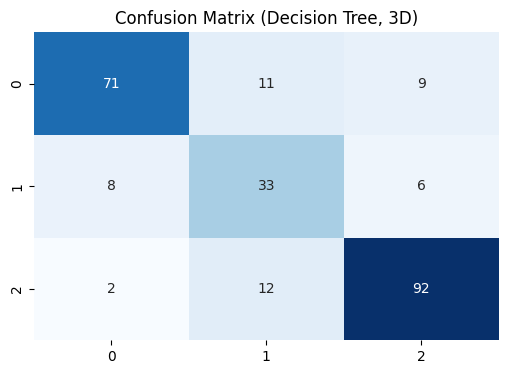

[[71 11  9]
 [ 8 33  6]
 [ 2 12 92]]
[0. 0. 0. 1. 1. 1. 2. 2. 1. 0. 0. 2. 0. 2. 1. 1. 1. 2. 1. 2. 0. 2. 0. 2.
 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 1. 1. 0. 2. 0. 2. 2. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 0. 2. 2. 1. 1. 1. 2. 2. 0. 0. 2. 1. 1. 2.
 1. 2. 0. 0. 0. 1. 0. 2. 0. 2. 0. 0. 1. 2. 0. 0. 2. 0. 0. 1. 2. 2. 0. 2.
 0. 2. 1. 0. 2. 2. 2. 2. 2. 1. 0. 0. 0. 2. 0. 2. 0. 0. 1. 1. 0. 2. 2. 0.
 0. 1. 1. 2. 1. 0. 2. 2. 1. 2. 1. 0. 2. 2. 2. 2. 0. 1. 1. 1. 0. 0. 2. 2.
 2. 0. 0. 1. 0. 2. 2. 2. 0. 0. 1. 2. 0. 2. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2.
 1. 0. 0. 1. 2. 0. 0. 1. 0. 1. 1. 0. 2. 1. 1. 2. 0. 2. 2. 1. 1. 0. 2. 2.
 2. 1. 1. 1. 0. 2. 1. 2. 2. 1. 2. 0. 2. 2. 0. 2. 2. 2. 0. 0. 2. 2. 2. 0.
 2. 2. 0. 2. 0. 2. 2. 0. 0. 1. 2. 2. 1. 0. 2. 1. 1. 0. 0. 0. 1. 1. 0. 2.
 0. 2. 0. 1.]
Classification Accuracy Score (Decision Tree, 3D): 0.80


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


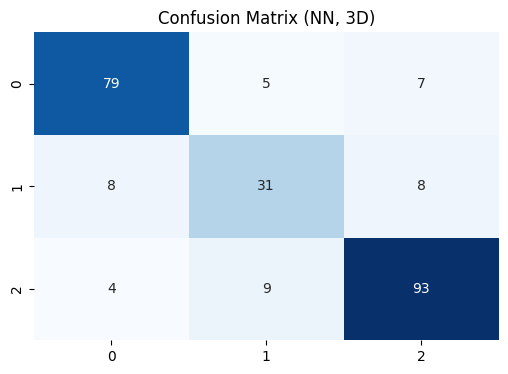

[[79  5  7]
 [ 6 33  8]
 [ 4  8 94]]
[0. 0. 0. 2. 2. 1. 2. 2. 1. 0. 0. 2. 0. 2. 1. 1. 1. 2. 1. 2. 0. 2. 0. 2.
 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 1. 0. 0. 0. 2. 0. 2. 2. 1. 2. 2. 2. 2.
 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 0. 2. 2. 1. 1. 1. 2. 2. 0. 0. 2. 1. 2. 2.
 2. 2. 0. 0. 0. 2. 0. 2. 0. 2. 0. 0. 1. 2. 0. 0. 1. 2. 0. 1. 2. 2. 0. 1.
 0. 2. 2. 0. 2. 2. 2. 2. 2. 0. 1. 0. 0. 2. 0. 2. 0. 0. 2. 1. 0. 2. 2. 0.
 0. 1. 1. 2. 1. 0. 2. 2. 0. 2. 1. 0. 2. 2. 2. 1. 0. 1. 0. 0. 0. 0. 2. 2.
 2. 0. 0. 2. 0. 2. 2. 2. 1. 0. 1. 2. 0. 2. 0. 0. 2. 0. 2. 2. 0. 2. 2. 2.
 1. 0. 0. 1. 2. 0. 0. 1. 0. 2. 1. 0. 0. 1. 1. 2. 0. 2. 2. 1. 1. 0. 2. 1.
 2. 0. 2. 2. 0. 1. 1. 2. 2. 1. 2. 0. 0. 2. 0. 2. 2. 2. 0. 0. 2. 2. 2. 0.
 0. 2. 0. 2. 0. 2. 1. 0. 0. 1. 2. 2. 2. 0. 2. 1. 0. 0. 0. 0. 1. 0. 0. 2.
 0. 2. 0. 1.]
Classification Accuracy Score (NN, 3D): 0.83


In [ ]:
#2.1.1: Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import svm
from sklearn import tree
from sklearn import neural_network
from sklearn.preprocessing import StandardScaler

#scaling data (inputs only for classification)
scaler_input = StandardScaler()
scaler_input.fit(input_data_3D) # fit the scaler to the input data
input_data_3D_scaled=scaler_input.transform(input_data_3D) # scale the input training data

#splitting data
seed = 123
input_data_3D_train, input_data_3D_test, output_data_3D_train, output_data_3D_test = train_test_split(input_data_3D_scaled, output_data_3D, train_size=0.75, random_state=seed)

#Support Vector Classifier
svc_model = svm.SVC(kernel='rbf')
svc_model.fit(input_data_3D_train, output_data_3D_train['coilable'])
output_data_3D_test_predict_svc = svc_model.predict(input_data_3D_test)

confusion_svc = confusion_matrix(output_data_3D_test['coilable'], output_data_3D_test_predict_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SVM, 3D)")
plt.show()
print(confusion_svc)


accuracy_3D_svc = accuracy_score(output_data_3D_test['coilable'], output_data_3D_test_predict_svc)
print(output_data_3D_test_predict_svc)
print(f"Classification Accuracy Score (SVM, 3D): {accuracy_3D_svc:.2f}")

#Decision Tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(input_data_3D_train, output_data_3D_train['coilable'])
output_data_3D_test_predict_tree = tree_model.predict(input_data_3D_test)

confusion_tree = confusion_matrix(output_data_3D_test['coilable'], output_data_3D_test_predict_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Decision Tree, 3D)")
plt.show()
print(confusion_tree)


accuracy_3D_tree = accuracy_score(output_data_3D_test['coilable'], output_data_3D_test_predict_tree)
print(output_data_3D_test_predict_tree)
print(f"Classification Accuracy Score (Decision Tree, 3D): {accuracy_3D_tree:.2f}")

#Neural Network Classifier
nn_model = neural_network.MLPClassifier()
nn_model.fit(input_data_3D_train, output_data_3D_train['coilable'])
output_data_3D_test_predict_nn = nn_model.predict(input_data_3D_test)

confusion_nn = confusion_matrix(output_data_3D_test['coilable'], output_data_3D_test_predict_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (NN, 3D)")
plt.show()
print(confusion_svc)

accuracy_3D_nn = accuracy_score(output_data_3D_test['coilable'], output_data_3D_test_predict_nn)
print(output_data_3D_test_predict_nn)
print(f"Classification Accuracy Score (NN, 3D): {accuracy_3D_nn:.2f}")


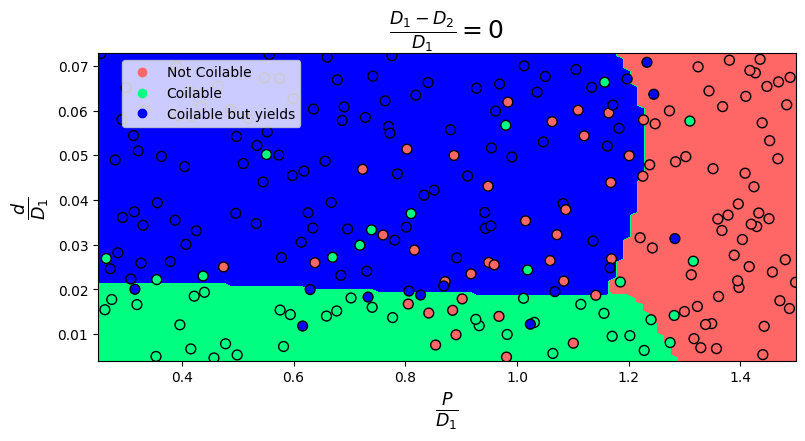

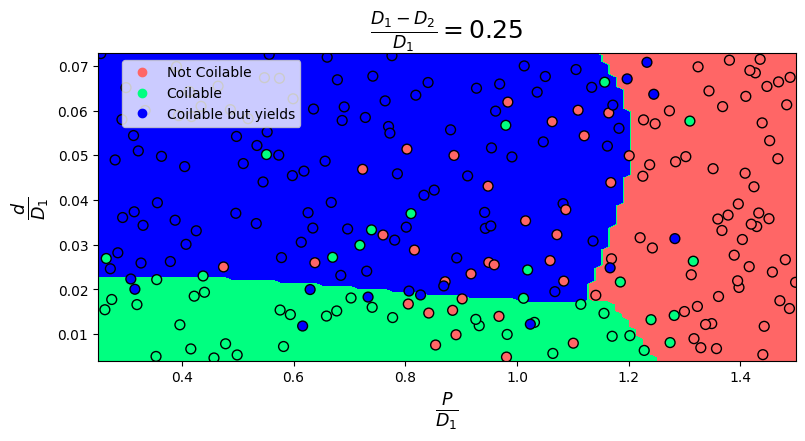

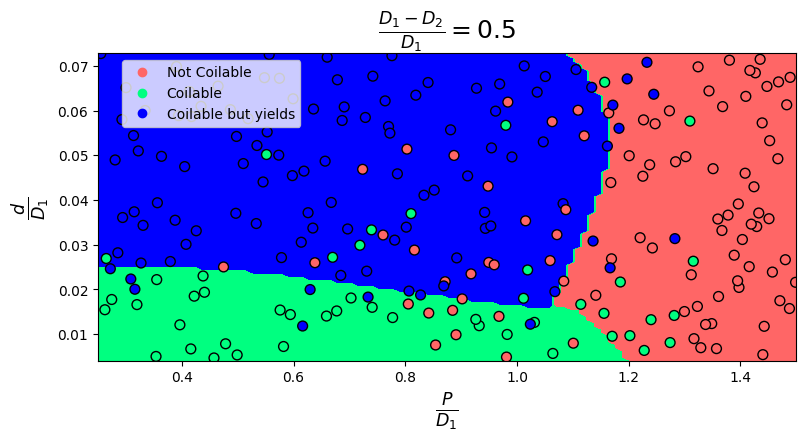

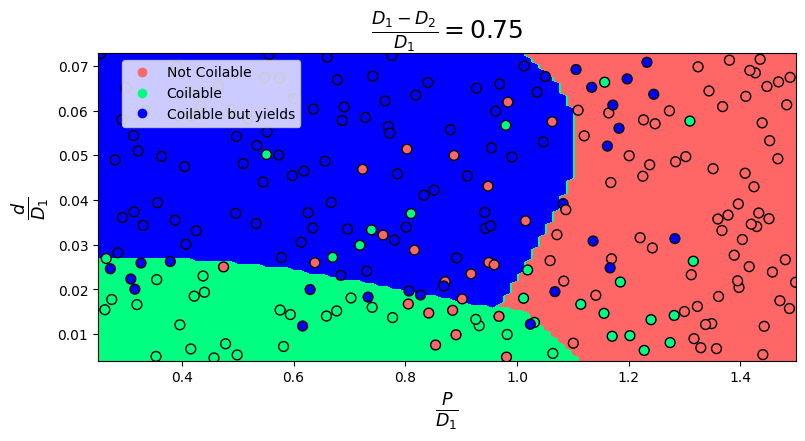

In [ ]:
from matplotlib.colors import ListedColormap

# Define the values for fixed_ratio_top_diameter
fixed_ratio_top_diameters = [0, 0.25, 0.5, 0.75]


custom_cmap = ListedColormap(['#FF6666', '#00FF80', 'blue'])


# Loop over different values of fixed_ratio_top_diameter
for fixed_ratio_top_diameter in fixed_ratio_top_diameters:
    # Generate a grid of values for ratio_d and ratio_pitch
    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    # Create a meshgrid
    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)

    # Flatten the meshgrid to obtain input data for prediction
    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))
    #input_data_mesh_scaled = scaler_input.transform(input_data_mesh)

    # Use the SVM model to predict the class labels for each point in the grid
    output_data_mesh_predict_svc = svc_model.predict(input_data_mesh)

    # Reshape the predictions to match the shape of the meshgrid
    output_data_mesh_predict_svc = output_data_mesh_predict_svc.reshape(ratio_d_mesh.shape)


    # Plot the contour plot with custom colormap
    # Creating mesh with rescaled values
    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)


    plt.figure(figsize=(9, 4))
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, output_data_mesh_predict_svc, cmap=custom_cmap, alpha=1)

    # Scatter plot with valid indexing using custom colormap
    input_data_3D_test_rescaled = scaler_input.inverse_transform(input_data_3D_test)
    scatter = plt.scatter(input_data_3D_test_rescaled[:, 0], input_data_3D_test_rescaled[:, 1], c=output_data_3D_test['coilable'], edgecolors='k', cmap=custom_cmap, marker='o', s=50)
    legend_labels = ['Not Coilable', 'Coilable', 'Coilable but yields']
    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right', bbox_to_anchor=(0.3, 1))
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()

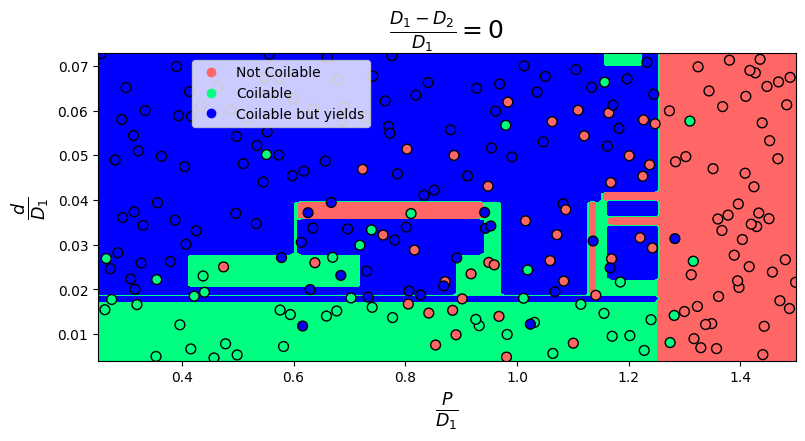

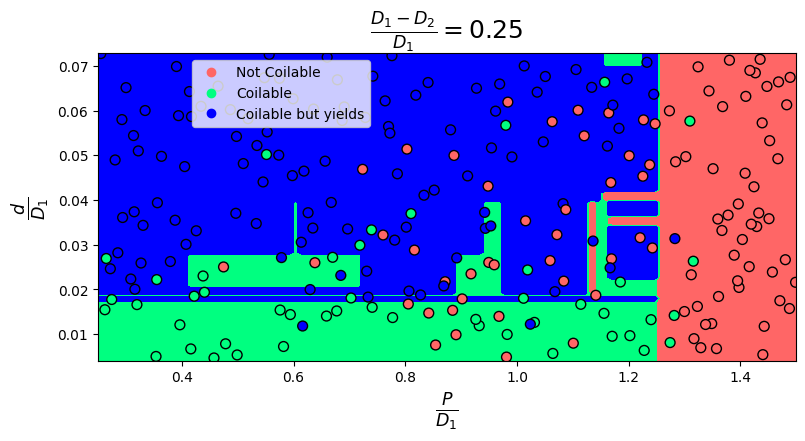

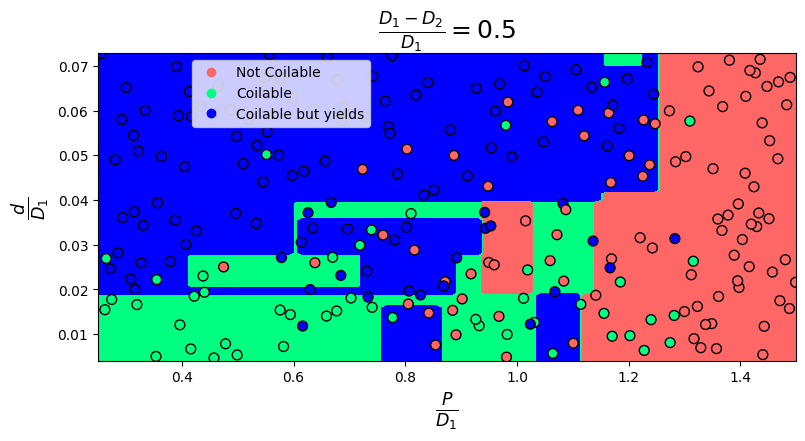

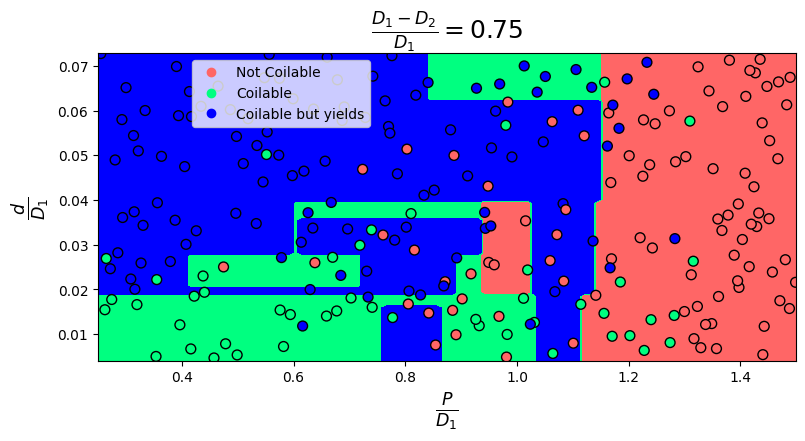

In [ ]:

for fixed_ratio_top_diameter in fixed_ratio_top_diameters:

    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)


    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))


    # Use the decision tree model to predict the class labels for each point in the grid
    output_data_mesh_predict_tree = tree_model.predict(input_data_mesh)

    output_data_mesh_predict_tree = output_data_mesh_predict_tree.reshape(ratio_d_mesh.shape)

    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)


    plt.figure(figsize=(9, 4))
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, output_data_mesh_predict_tree, cmap=custom_cmap, alpha=1)

    # Scatter plot with valid indexing using custom colormap
    input_data_3D_test_rescaled = scaler_input.inverse_transform(input_data_3D_test)
    scatter = plt.scatter(input_data_3D_test_rescaled[:, 0], input_data_3D_test_rescaled[:, 1], c=output_data_3D_test['coilable'], edgecolors='k', cmap=custom_cmap, marker='o', s=50)
    legend_labels = ['Not Coilable', 'Coilable', 'Coilable but yields']
    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right', bbox_to_anchor=(0.4, 1))
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()

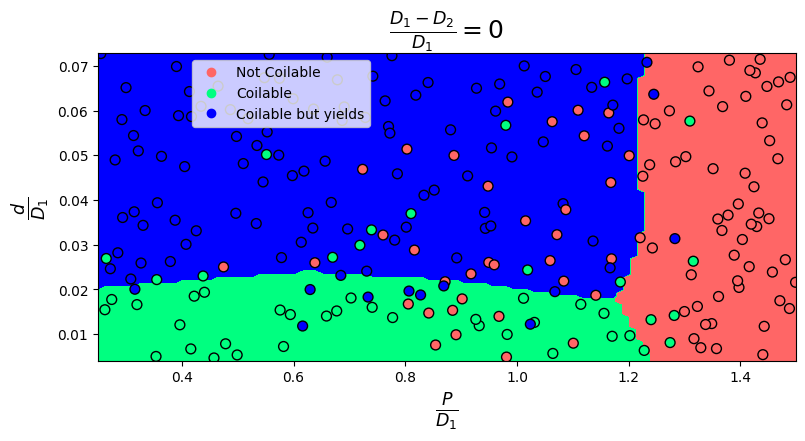

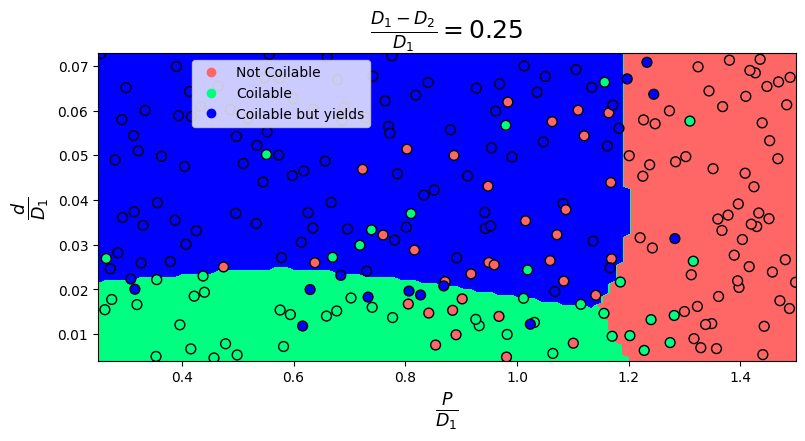

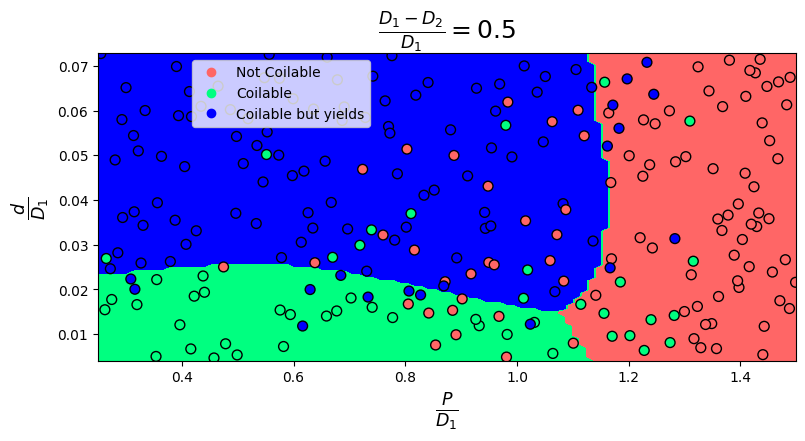

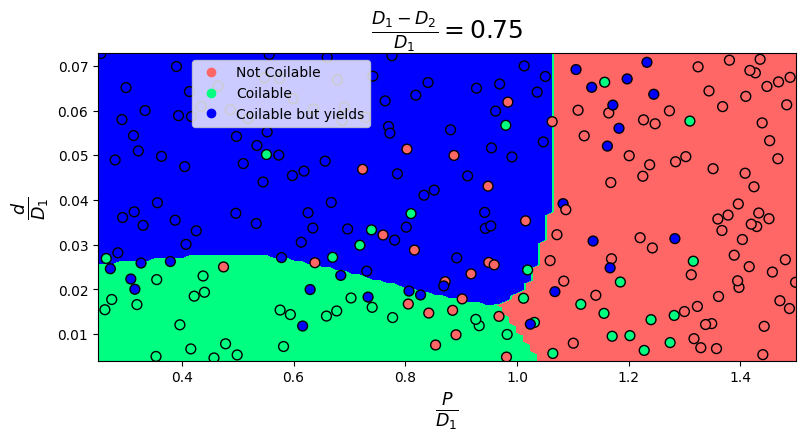

In [ ]:

for fixed_ratio_top_diameter in fixed_ratio_top_diameters:

    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)


    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))


    # Use the NN model to predict the class labels for each point in the grid
    output_data_mesh_predict_nn = nn_model.predict(input_data_mesh)

    output_data_mesh_predict_nn = output_data_mesh_predict_nn.reshape(ratio_d_mesh.shape)

    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)


    plt.figure(figsize=(9, 4))
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, output_data_mesh_predict_nn, cmap=custom_cmap, alpha=1)

    # Scatter plot with valid indexing using custom colormap
    input_data_3D_test_rescaled = scaler_input.inverse_transform(input_data_3D_test)
    scatter = plt.scatter(input_data_3D_test_rescaled[:, 0], input_data_3D_test_rescaled[:, 1], c=output_data_3D_test['coilable'], edgecolors='k', cmap=custom_cmap, marker='o', s=50)
    legend_labels = ['Not Coilable', 'Coilable', 'Coilable but yields']
    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right', bbox_to_anchor=(0.4, 1))
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()

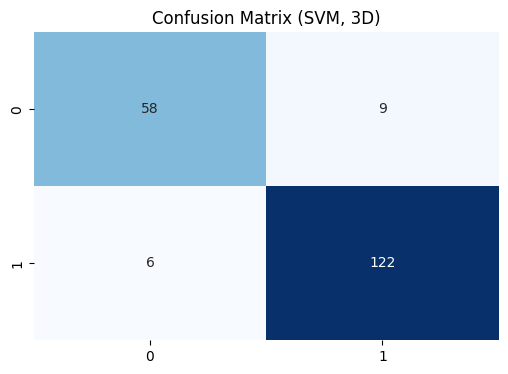

[[ 58   9]
 [  6 122]]
[1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0.]
Classification Accuracy (SVM, 3D): 0.92
Classification Precision Score (SVM, 3D): 0.93
Classification Recall Score (SVM, 3D): 0.95
Classification F1 Score (SVM, 3D): 0.94


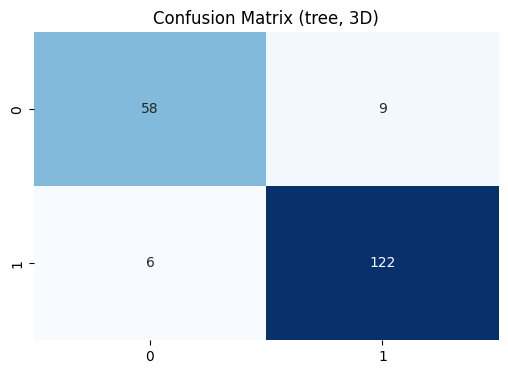

[[ 58   9]
 [  6 122]]
[1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0.]
Classification Accuracy Score (DT, 3D): 0.92
Classification Precision Score (DT, 3D): 0.93
Classification Recall Score (DT, 3D): 0.95
Classification F1 Score (DT, 3D): 0.94


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


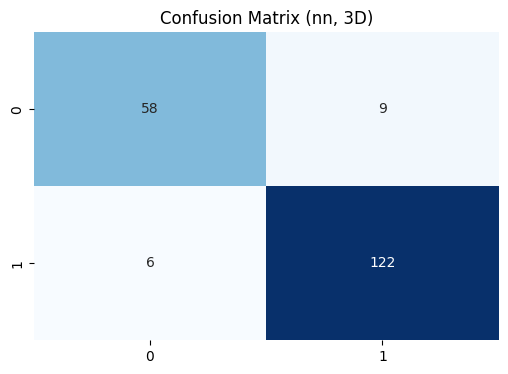

[[ 58   9]
 [  5 123]]
[1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0.]
Classification Accuracy Score (NN, 3D): 0.93
Classification Precision Score (NN, 3D): 0.93
Classification Recall Score (NN, 3D): 0.96
Classification F1 Score (NN, 3D): 0.95


In [ ]:
#2.1.1: Classification with just two categories

#reducing into two categories (making values for coilable but yields into coilable)
output_data_3D_train_two = output_data_3D_train.replace(2, 1)
output_data_3D_test_two = output_data_3D_test.replace(2, 1)

#Support Vector Classifier
svc_model = svm.SVC()
svc_model.fit(input_data_3D_train, output_data_3D_train_two['coilable'])
output_data_3D_test_predict_svc = svc_model.predict(input_data_3D_test)


confusion_svc = confusion_matrix(output_data_3D_test_two['coilable'], output_data_3D_test_predict_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SVM, 3D)")
plt.show()
print(confusion_svc)

accuracy_3D_svc = accuracy_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_svc)
precision_3D_svc = precision_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_svc)
recall_3D_svc = recall_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_svc)
f1_3D_svc = f1_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_svc)
print(output_data_3D_test_predict_svc)
print(f"Classification Accuracy (SVM, 3D): {accuracy_3D_svc:.2f}")
print(f"Classification Precision Score (SVM, 3D): {precision_3D_svc:.2f}")
print(f"Classification Recall Score (SVM, 3D): {recall_3D_svc:.2f}")
print(f"Classification F1 Score (SVM, 3D): {f1_3D_svc:.2f}")

#Decision Tree Classifier
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(input_data_3D_train, output_data_3D_train_two['coilable'])
output_data_3D_test_predict_tree = tree_model.predict(input_data_3D_test)

confusion_tree = confusion_matrix(output_data_3D_test_two['coilable'], output_data_3D_test_predict_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (tree, 3D)")
plt.show()
print(confusion_tree)


accuracy_3D_tree = accuracy_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_tree)
precision_3D_tree = precision_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_tree)
recall_3D_tree = recall_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_tree)
f1_3D_tree = f1_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_tree)
print(output_data_3D_test_predict_tree)
print(f"Classification Accuracy Score (DT, 3D): {accuracy_3D_tree:.2f}")
print(f"Classification Precision Score (DT, 3D): {precision_3D_tree:.2f}")
print(f"Classification Recall Score (DT, 3D): {recall_3D_tree:.2f}")
print(f"Classification F1 Score (DT, 3D): {f1_3D_tree:.2f}")

#Neural Network Classifier
nn_model = neural_network.MLPClassifier()
nn_model.fit(input_data_3D_train, output_data_3D_train_two['coilable'])
output_data_3D_test_predict_nn = nn_model.predict(input_data_3D_test)

confusion_nn = confusion_matrix(output_data_3D_test_two['coilable'], output_data_3D_test_predict_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (nn, 3D)")
plt.show()
print(confusion_nn)

accuracy_3D_nn = accuracy_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_nn)
precision_3D_nn = precision_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_nn)
recall_3D_nn = recall_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_nn)
f1_3D_nn = f1_score(output_data_3D_test_two['coilable'], output_data_3D_test_predict_nn)
print(output_data_3D_test_predict_nn)
print(f"Classification Accuracy Score (NN, 3D): {accuracy_3D_nn:.2f}")
print(f"Classification Precision Score (NN, 3D): {precision_3D_nn:.2f}")
print(f"Classification Recall Score (NN, 3D): {recall_3D_nn:.2f}")
print(f"Classification F1 Score (NN, 3D): {f1_3D_nn:.2f}")


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process.kernels import Matern
from sklearn import gaussian_process
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
input_data_3D_train, input_data_3D_test, output_data_3D_train, output_data_3D_test = train_test_split(
    input_data_3D_scaled, output_data_3D, test_size=0.2, random_state=42
)

# Scale the output variables
scaler_sigmacrit = StandardScaler()
output_data_3D_train_scaled_sigmacrit = scaler_sigmacrit.fit_transform(
    output_data_3D_train[['sigma_crit']]
)
output_data_3D_test_scaled_sigmacrit = scaler_sigmacrit.transform(
    output_data_3D_test[['sigma_crit']]
)

scaler_energy = StandardScaler()
output_data_3D_train_scaled_energy = scaler_energy.fit_transform(
    output_data_3D_train[['energy']]
)
output_data_3D_test_scaled_energy = scaler_energy.transform(
    output_data_3D_test[['energy']]
)

# Gaussian Process Regression for sigma_crit
gp_model_sigmacrit = gaussian_process.GaussianProcessRegressor(kernel=Matern(nu=2.5))
gp_model_sigmacrit.fit(input_data_3D_train, output_data_3D_train_scaled_sigmacrit)
output_data_3D_test_predict_gp_sigmacrit = gp_model_sigmacrit.predict(input_data_3D_test)

# Gaussian Process Regression for energy
gp_model_energy = gaussian_process.GaussianProcessRegressor(kernel=Matern(nu=2.5))
gp_model_energy.fit(input_data_3D_train, output_data_3D_train_scaled_energy)
output_data_3D_test_predict_gp_energy = gp_model_energy.predict(input_data_3D_test)

# Inverse transform the scaled predictions to get the original scale
output_data_3D_test_predict_gp_sigmacrit_original_scale = scaler_sigmacrit.inverse_transform(
    output_data_3D_test_predict_gp_sigmacrit.reshape(-1, 1)
)

output_data_3D_test_predict_gp_energy_original_scale = scaler_energy.inverse_transform(
    output_data_3D_test_predict_gp_energy.reshape(-1, 1)
)

# Calculate metrics on the original scale
mse_value_3D_gp_sigmacrit = mean_squared_error(
    output_data_3D_test[['sigma_crit']], output_data_3D_test_predict_gp_sigmacrit_original_scale
)
r2_value_3D_gp_sigmacrit = r2_score(
    output_data_3D_test[['sigma_crit']], output_data_3D_test_predict_gp_sigmacrit_original_scale
)

mse_value_3D_gp_energy = mean_squared_error(
    output_data_3D_test[['energy']], output_data_3D_test_predict_gp_energy_original_scale
)
r2_value_3D_gp_energy = r2_score(
    output_data_3D_test[['energy']], output_data_3D_test_predict_gp_energy_original_scale
)

print(f"Regression MSE (GP, sigma_crit, 3D): {mse_value_3D_gp_sigmacrit:.2f}")
print(f"Regression R2 (GP, sigma_crit, 3D): {r2_value_3D_gp_sigmacrit:.2f}")
print(f"Regression MSE (GP, energy, 3D): {mse_value_3D_gp_energy:.2f}")
print(f"Regression R2 (GP, energy, 3D): {r2_value_3D_gp_energy:.2f}")

Regression MSE (GP, sigma_crit, 3D): 17.03
Regression R2 (GP, sigma_crit, 3D): 0.96
Regression MSE (GP, energy, 3D): 3.84
Regression R2 (GP, energy, 3D): 0.98


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


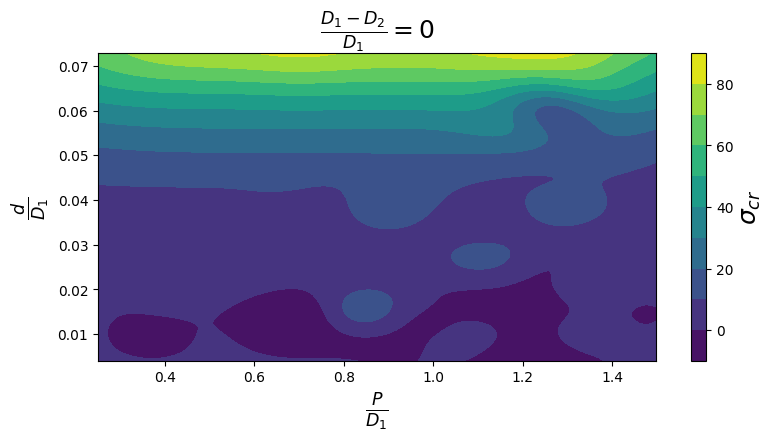

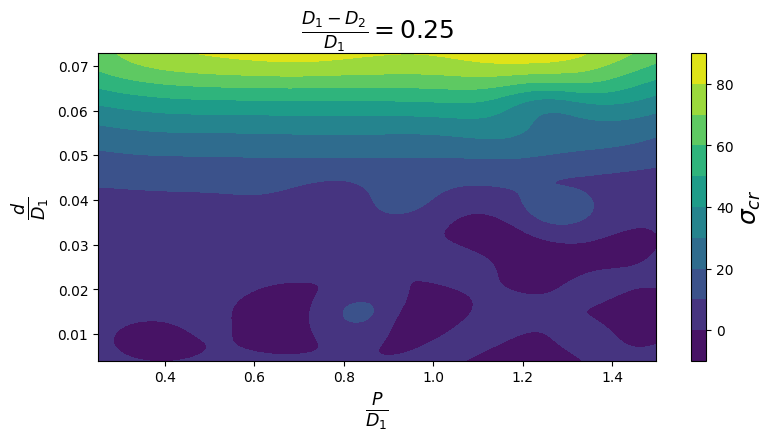

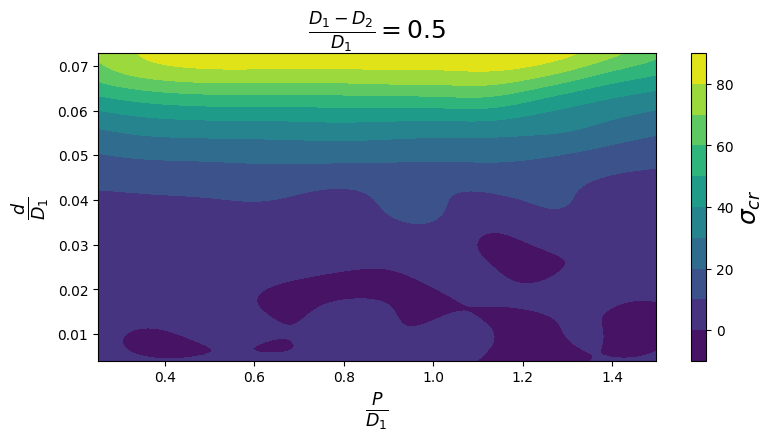

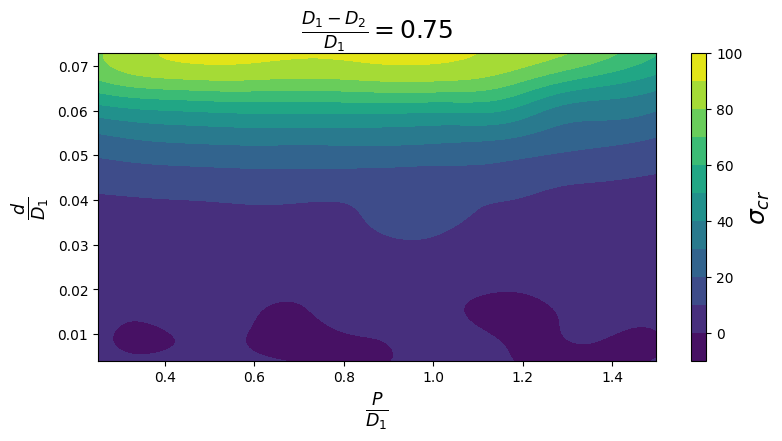

In [ ]:

for fixed_ratio_top_diameter in fixed_ratio_top_diameters:

    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)


    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))



    input_data_predict = pd.DataFrame({'ratio_d': ratio_d_mesh.flatten(), 'ratio_pitch': ratio_pitch_mesh.flatten(), 'ratio_top_diameter': fixed_ratio_top_diameter})

    # Predict sigma_crit using the Gaussian Process model
    sigma_crit_gp_predicted = gp_model_sigmacrit.predict(input_data_predict)
    sigma_crit_gp_predicted_rescaled = scaler_sigmacrit.inverse_transform(sigma_crit_gp_predicted.reshape(-1,1))

    # Reshape the predicted values to the shape of the mesh grid
    sigma_crit_mesh_rescaled = sigma_crit_gp_predicted_rescaled.reshape(ratio_d_mesh.shape)

    # Creating mesh with rescaled values
    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)


    # Plot the 2D contour
    plt.figure(figsize=(9, 4))
    contour_levels = 10
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, sigma_crit_mesh_rescaled, levels=contour_levels, cmap='viridis')

    colorbar=plt.colorbar(contour)
    colorbar.set_label(r'$\sigma_{cr}$', fontsize=18)
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()





/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


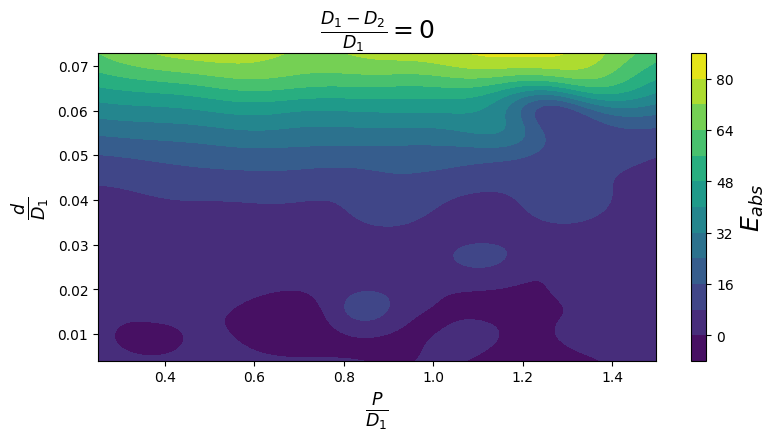

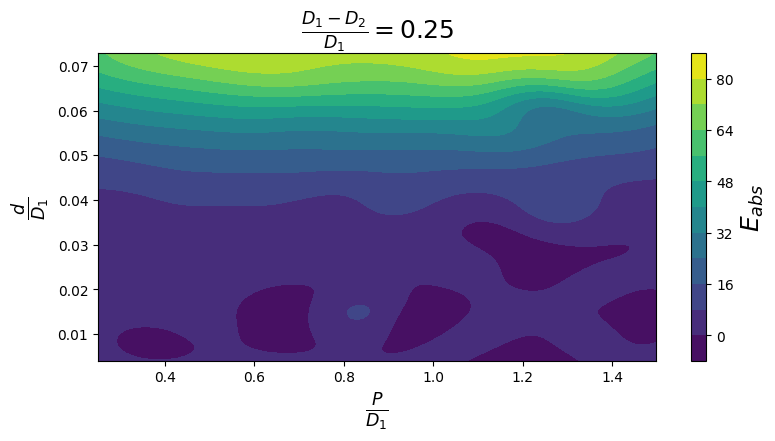

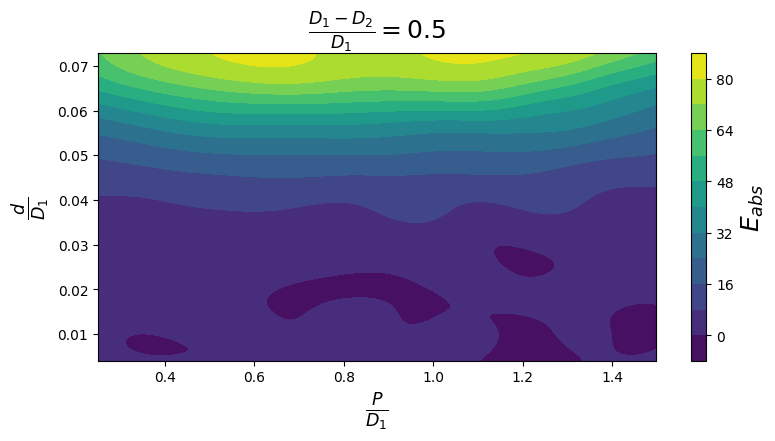

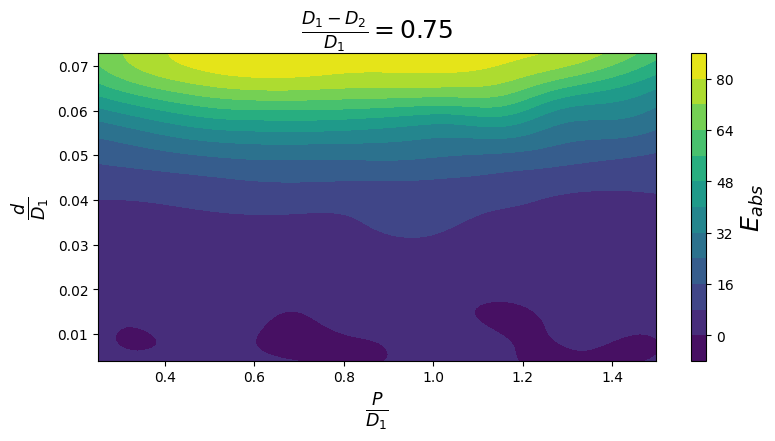

In [ ]:

for fixed_ratio_top_diameter in fixed_ratio_top_diameters:

    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)


    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))



    input_data_predict = pd.DataFrame({'ratio_d': ratio_d_mesh.flatten(), 'ratio_pitch': ratio_pitch_mesh.flatten(), 'ratio_top_diameter': fixed_ratio_top_diameter})

    # Predict energy using the Gaussian Process model
    energy_gp_predicted = gp_model_energy.predict(input_data_predict)
    energy_gp_predicted_rescaled = scaler_sigmacrit.inverse_transform(energy_gp_predicted.reshape(-1,1))

    # Reshape the predicted values to the shape of the mesh grid
    energy_mesh_rescaled = energy_gp_predicted_rescaled.reshape(ratio_d_mesh.shape)

    # Creating mesh with rescaled values
    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)


    # Plot the 2D contour
    plt.figure(figsize=(9, 4))
    contour_levels = 10
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, energy_mesh_rescaled, levels=contour_levels, cmap='viridis')

    colorbar=plt.colorbar(contour)
    colorbar.set_label(r'$E_{abs}$', fontsize=18)
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()





In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression for sigma_crit
rf_model_sigmacrit = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the parameters
rf_model_sigmacrit.fit(input_data_3D_train, output_data_3D_train_scaled_sigmacrit)
output_data_3D_test_predict_rf_sigmacrit = rf_model_sigmacrit.predict(input_data_3D_test)

# Random Forest Regression for energy
rf_model_energy = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the parameters
rf_model_energy.fit(input_data_3D_train, output_data_3D_train_scaled_energy)
output_data_3D_test_predict_rf_energy = rf_model_energy.predict(input_data_3D_test)



# Inverse transform the scaled predictions to get the original scale for Random Forest
output_data_3D_test_predict_rf_sigmacrit_original_scale = scaler_sigmacrit.inverse_transform(
    output_data_3D_test_predict_rf_sigmacrit.reshape(-1, 1)
)

output_data_3D_test_predict_rf_energy_original_scale = scaler_energy.inverse_transform(
    output_data_3D_test_predict_rf_energy.reshape(-1, 1)
)


# Calculate metrics on the original scale for Random Forest
mse_value_3D_rf_sigmacrit = mean_squared_error(
    output_data_3D_test[['sigma_crit']], output_data_3D_test_predict_rf_sigmacrit_original_scale
)
r2_value_3D_rf_sigmacrit = r2_score(
    output_data_3D_test[['sigma_crit']], output_data_3D_test_predict_rf_sigmacrit_original_scale
)

mse_value_3D_rf_energy = mean_squared_error(
    output_data_3D_test[['energy']], output_data_3D_test_predict_rf_energy_original_scale
)
r2_value_3D_rf_energy = r2_score(
    output_data_3D_test[['energy']], output_data_3D_test_predict_rf_energy_original_scale
)

print(f"Regression MSE (Random Forest, sigma_crit, 3D): {mse_value_3D_rf_sigmacrit:.2f}")
print(f"Regression R2 (Random Forest, sigma_crit, 3D): {r2_value_3D_rf_sigmacrit:.2f}")
print(f"Regression MSE (Random Forest, energy, 3D): {mse_value_3D_rf_energy:.2f}")
print(f"Regression R2 (Random Forest, energy, 3D): {r2_value_3D_rf_energy:.2f}")


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Regression MSE (Random Forest, sigma_crit, 3D): 22.84
Regression R2 (Random Forest, sigma_crit, 3D): 0.95
Regression MSE (Random Forest, energy, 3D): 6.42
Regression R2 (Random Forest, energy, 3D): 0.96


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


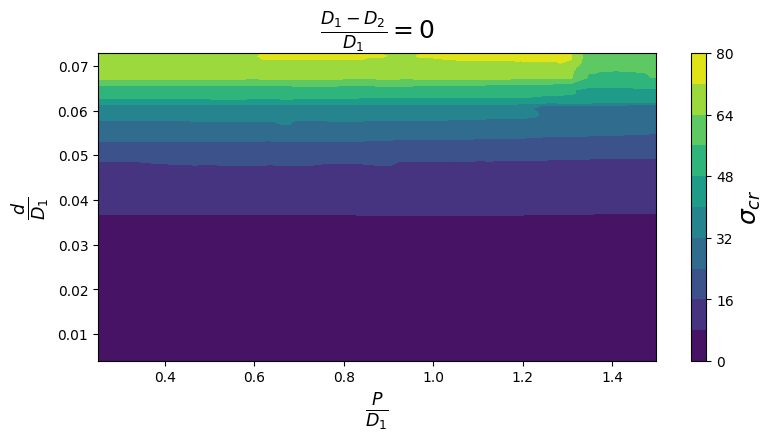

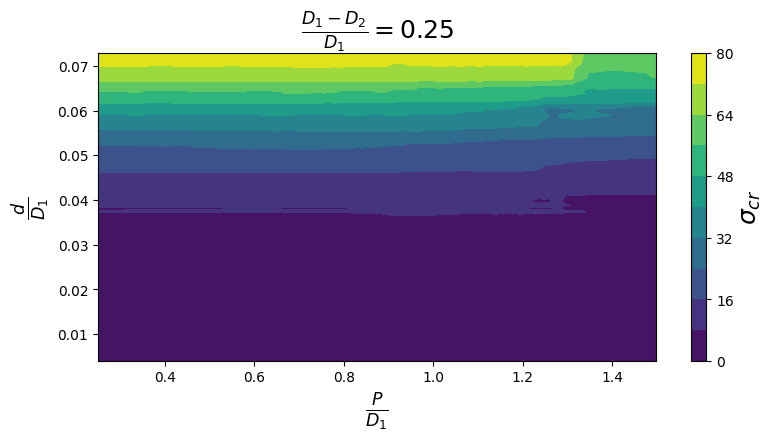

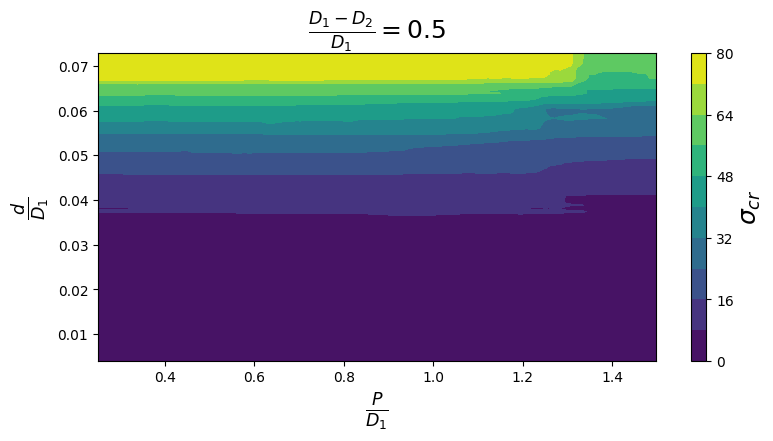

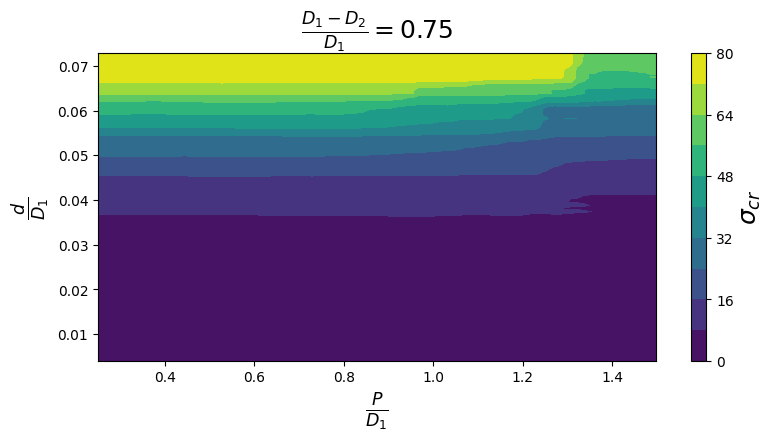

In [ ]:

for fixed_ratio_top_diameter in fixed_ratio_top_diameters:

    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)


    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))



    input_data_predict = pd.DataFrame({'ratio_d': ratio_d_mesh.flatten(), 'ratio_pitch': ratio_pitch_mesh.flatten(), 'ratio_top_diameter': fixed_ratio_top_diameter})

    # Predict sigma_crit using the random forest model
    sigma_crit_rf_predicted = rf_model_sigmacrit.predict(input_data_predict)
    sigma_crit_rf_predicted_rescaled = scaler_sigmacrit.inverse_transform(sigma_crit_rf_predicted.reshape(-1,1))

    # Reshape the predicted values to the shape of the mesh grid
    sigma_crit_mesh_rescaled = sigma_crit_rf_predicted_rescaled.reshape(ratio_d_mesh.shape)

    # Creating mesh with rescaled values
    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)

    # Plot the 2D contour
    plt.figure(figsize=(9, 4))
    contour_levels = 10
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, sigma_crit_mesh_rescaled, levels=contour_levels, cmap='viridis')

    colorbar=plt.colorbar(contour)
    colorbar.set_label(r'$\sigma_{cr}$', fontsize=18)
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()



/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


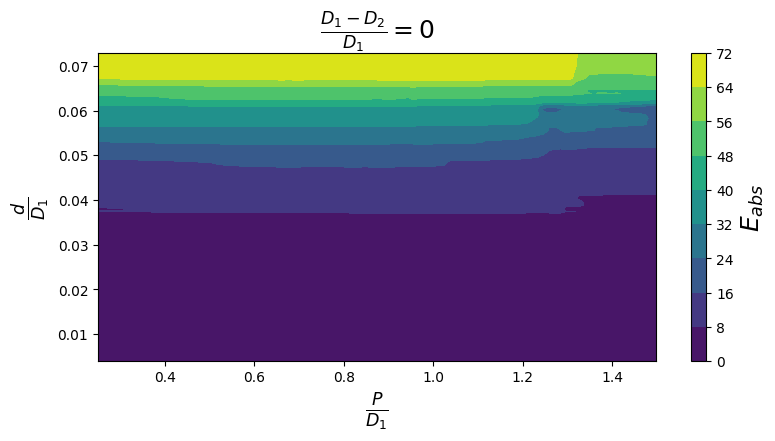

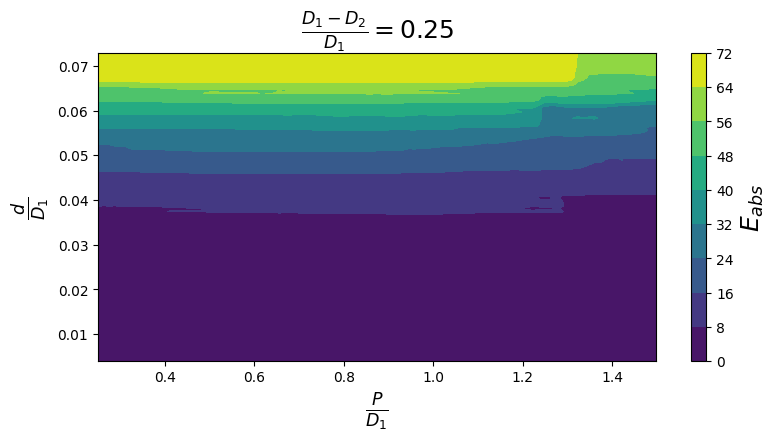

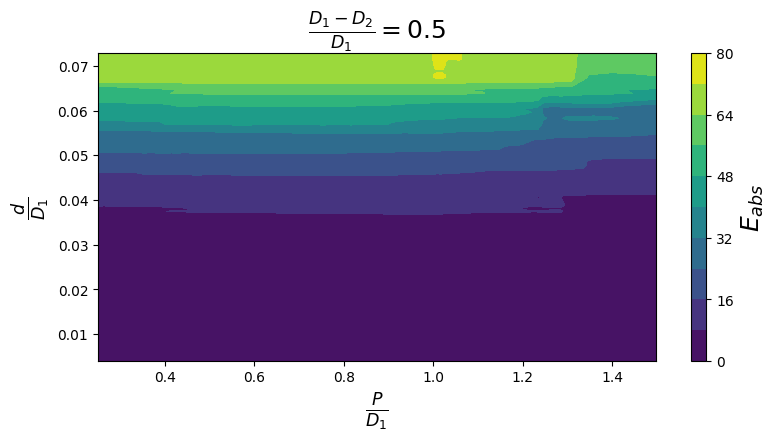

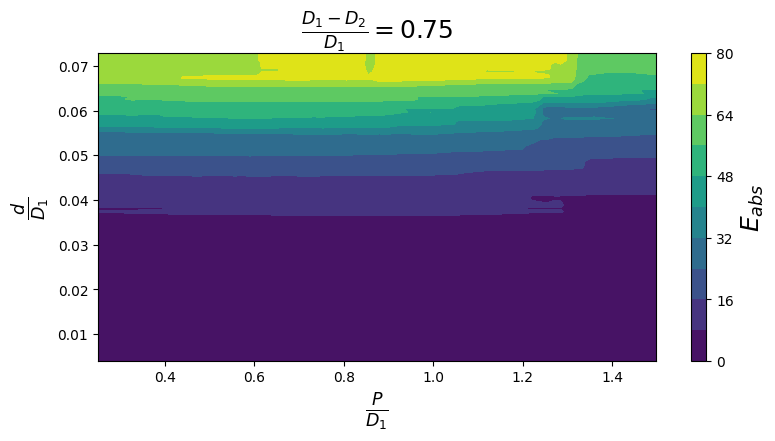

In [ ]:

for fixed_ratio_top_diameter in fixed_ratio_top_diameters:

    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)


    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))



    input_data_predict = pd.DataFrame({'ratio_d': ratio_d_mesh.flatten(), 'ratio_pitch': ratio_pitch_mesh.flatten(), 'ratio_top_diameter': fixed_ratio_top_diameter})

    # Predict energy using the random forest model
    energy_rf_predicted = rf_model_energy.predict(input_data_predict)
    energy_rf_predicted_rescaled = scaler_sigmacrit.inverse_transform(energy_rf_predicted.reshape(-1,1))

    # Reshape the predicted values to the shape of the mesh grid
    energy_mesh_rescaled = energy_rf_predicted_rescaled.reshape(ratio_d_mesh.shape)

    # Creating mesh with rescaled values
    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)


    # Plot the 2D contour
    plt.figure(figsize=(9, 4))
    contour_levels = 10
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, energy_mesh_rescaled, levels=contour_levels, cmap='viridis')

    colorbar=plt.colorbar(contour)
    colorbar.set_label(r'$E_{abs}$', fontsize=18)
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()





In [ ]:
from sklearn.linear_model import Ridge



# Ridge Regression for sigma_crit
ridge_model_sigmacrit = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model_sigmacrit.fit(input_data_3D_train, output_data_3D_train_scaled_sigmacrit)
output_data_3D_test_predict_ridge_sigmacrit = ridge_model_sigmacrit.predict(input_data_3D_test)

# Ridge Regression for energy
ridge_model_energy = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model_energy.fit(input_data_3D_train, output_data_3D_train_scaled_energy)
output_data_3D_test_predict_ridge_energy = ridge_model_energy.predict(input_data_3D_test)

# Inverse transform the scaled predictions to get the original scale for Ridge
output_data_3D_test_predict_ridge_sigmacrit_original_scale = scaler_sigmacrit.inverse_transform(
    output_data_3D_test_predict_ridge_sigmacrit.reshape(-1, 1)
)

output_data_3D_test_predict_ridge_energy_original_scale = scaler_energy.inverse_transform(
    output_data_3D_test_predict_ridge_energy.reshape(-1, 1)
)

# Calculate metrics on the original scale for Ridge
mse_value_3D_ridge_sigmacrit = mean_squared_error(
    output_data_3D_test[['sigma_crit']], output_data_3D_test_predict_ridge_sigmacrit_original_scale
)
r2_value_3D_ridge_sigmacrit = r2_score(
    output_data_3D_test[['sigma_crit']], output_data_3D_test_predict_ridge_sigmacrit_original_scale
)

mse_value_3D_ridge_energy = mean_squared_error(
    output_data_3D_test[['energy']], output_data_3D_test_predict_ridge_energy_original_scale
)
r2_value_3D_ridge_energy = r2_score(
    output_data_3D_test[['energy']], output_data_3D_test_predict_ridge_energy_original_scale
)

print(f"Regression MSE (Ridge, sigma_crit, 3D): {mse_value_3D_ridge_sigmacrit:.2f}")
print(f"Regression R2 (Ridge, sigma_crit, 3D): {r2_value_3D_ridge_sigmacrit:.2f}")
print(f"Regression MSE (Ridge, energy, 3D): {mse_value_3D_ridge_energy:.2f}")
print(f"Regression R2 (Ridge, energy, 3D): {r2_value_3D_ridge_energy:.2f}")


Regression MSE (Ridge, sigma_crit, 3D): 116.98
Regression R2 (Ridge, sigma_crit, 3D): 0.74
Regression MSE (Ridge, energy, 3D): 39.20
Regression R2 (Ridge, energy, 3D): 0.75


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


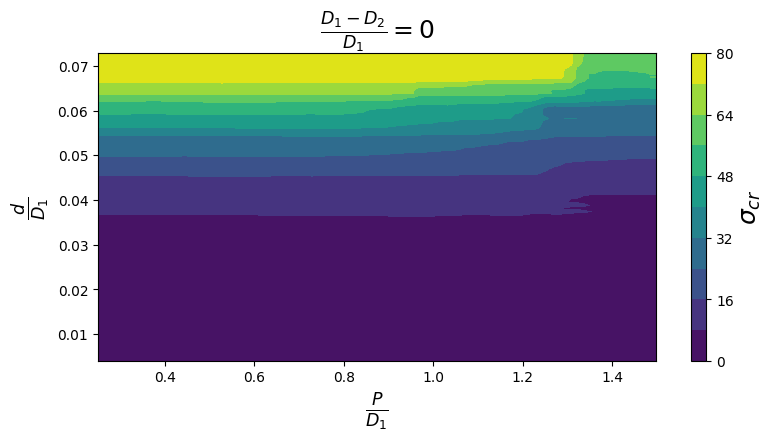

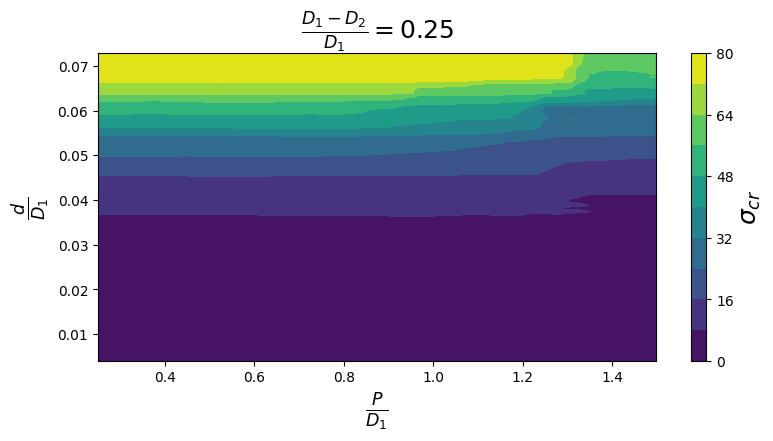

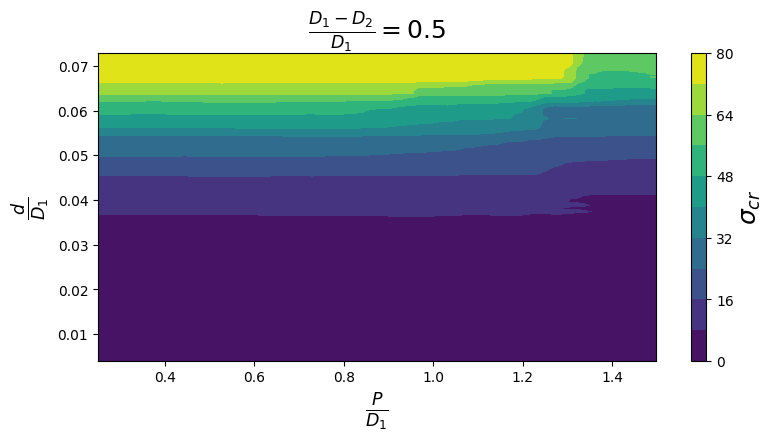

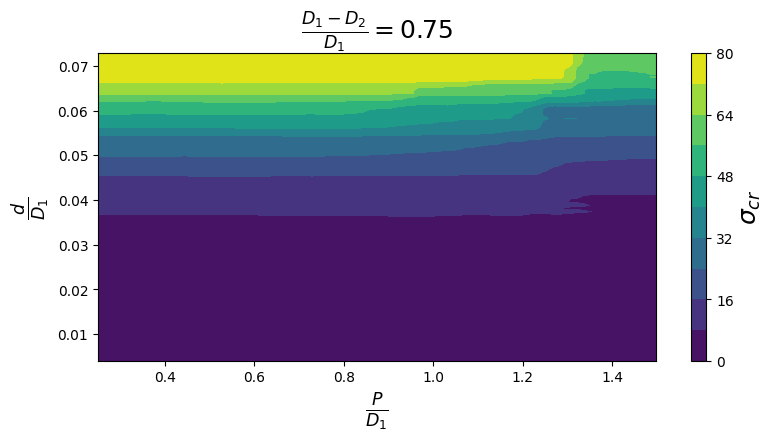

In [ ]:

for fixed_ratio_top_diameter in fixed_ratio_top_diameters:

    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)


    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))



    input_data_predict = pd.DataFrame({'ratio_d': ratio_d_mesh.flatten(), 'ratio_pitch': ratio_pitch_mesh.flatten(), 'ratio_top_diameter': fixed_ratio_top_diameter})

    # Predict sigma_crit using the ridge model
    sigma_crit_ridge_model_predicted = ridge_model_sigmacrit.predict(input_data_predict)
    sigma_crit_ridge_model_predicted_rescaled = scaler_sigmacrit.inverse_transform(sigma_crit_ridge_model_predicted.reshape(-1,1))

    # Reshape the predicted values to the shape of the mesh grid
    sigma_crit_mesh_rescaled = sigma_crit_rf_predicted_rescaled.reshape(ratio_d_mesh.shape)

    # Creating mesh with rescaled values
    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)

    # Plot the 2D contour
    plt.figure(figsize=(9, 4))
    contour_levels = 10
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, sigma_crit_mesh_rescaled, levels=contour_levels, cmap='viridis')

    colorbar=plt.colorbar(contour)
    colorbar.set_label(r'$\sigma_{cr}$', fontsize=18)
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()



/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


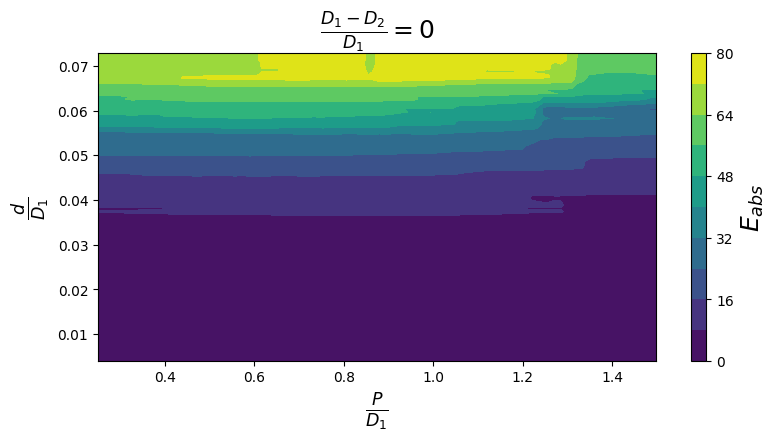

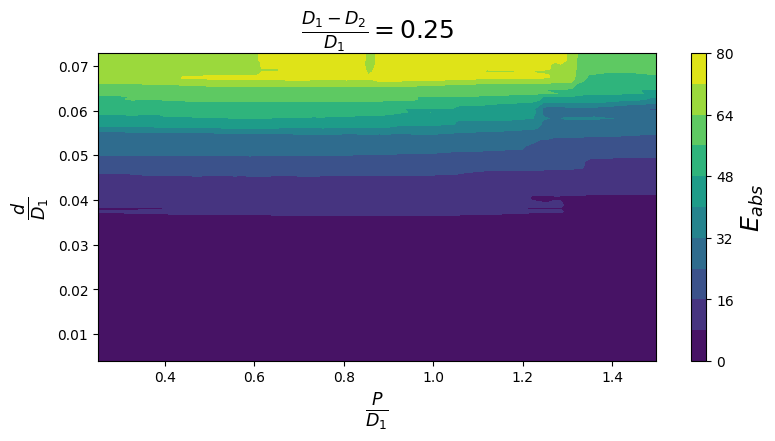

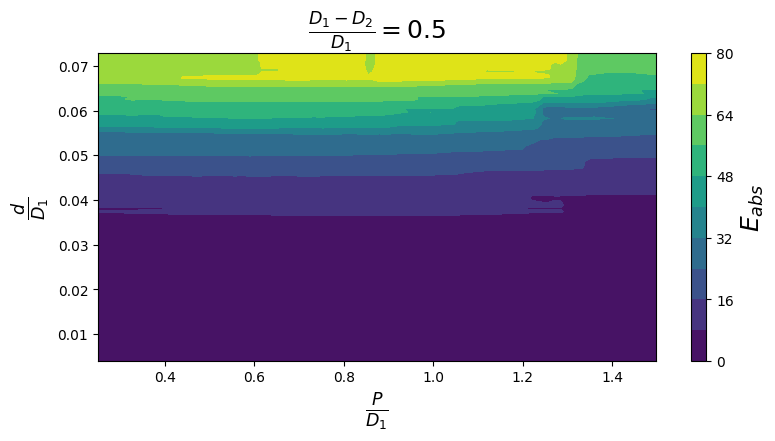

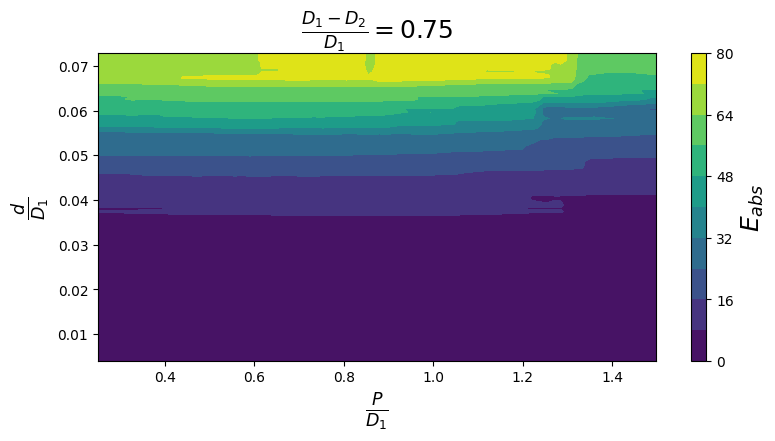

In [ ]:

for fixed_ratio_top_diameter in fixed_ratio_top_diameters:

    ratio_d_values = np.linspace(min(input_data_3D_scaled[:, 0]), max(input_data_3D_scaled[:, 0]), 100)
    ratio_pitch_values = np.linspace(min(input_data_3D_scaled[:, 1]), max(input_data_3D_scaled[:, 1]), 100)

    ratio_d_mesh, ratio_pitch_mesh = np.meshgrid(ratio_d_values, ratio_pitch_values)


    input_data_mesh = np.column_stack((ratio_d_mesh.ravel(), ratio_pitch_mesh.ravel(), np.full_like(ratio_d_mesh.ravel(), fixed_ratio_top_diameter)))



    input_data_predict = pd.DataFrame({'ratio_d': ratio_d_mesh.flatten(), 'ratio_pitch': ratio_pitch_mesh.flatten(), 'ratio_top_diameter': fixed_ratio_top_diameter})

    # Predict Energy using the ridge model
    energy_ridge_model_predicted = ridge_model_energy.predict(input_data_predict)
    energy_ridge_model_predicted_rescaled = scaler_energy.inverse_transform(energy_ridge_model_predicted.reshape(-1,1))

    # Reshape the predicted values to the shape of the mesh grid
    energy_mesh_rescaled = energy_rf_predicted_rescaled.reshape(ratio_d_mesh.shape)

    # Creating mesh with rescaled values
    input_data_3D_rescaled = scaler_input.inverse_transform(input_data_3D_scaled)
    ratio_d_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 0]), max(input_data_3D_rescaled[:, 0]), 100)
    ratio_pitch_values_rescaled = np.linspace(min(input_data_3D_rescaled[:, 1]), max(input_data_3D_rescaled[:, 1]), 100)
    ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled = np.meshgrid(ratio_d_values_rescaled, ratio_pitch_values_rescaled)

    # Plot the 2D contour
    plt.figure(figsize=(9, 4))
    contour_levels = 10
    contour = plt.contourf(ratio_d_mesh_rescaled, ratio_pitch_mesh_rescaled, energy_mesh_rescaled, levels=contour_levels, cmap='viridis')

    colorbar=plt.colorbar(contour)
    colorbar.set_label(r'$E_{abs}$', fontsize=18)
    plt.ylabel(r'$\frac{d}{D_1}$', fontsize=18)
    plt.xlabel(r'$\frac{P}{D_1}$', fontsize=18)
    plt.title(r'$\frac{D_1 - D_2}{D_1}=$' + str(fixed_ratio_top_diameter), fontsize=18)

plt.show()



# Classification of 7D dataset

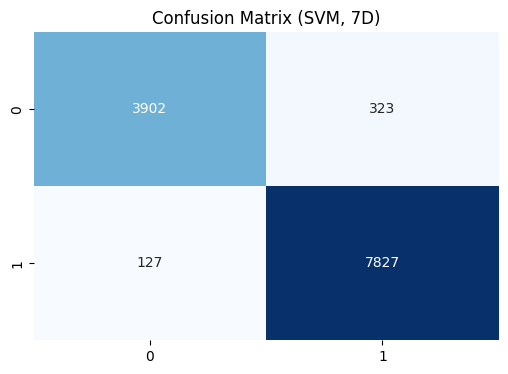

[[3902  323]
 [ 127 7827]]
[1. 1. 1. ... 1. 1. 0.]
Classification Accuracy (SVM, 7D): 0.96
Classification Precision Score (SVM, 7D): 0.96
Classification Recall Score (SVM, 7D): 0.98
Classification F1 Score (SVM, 7D): 0.97


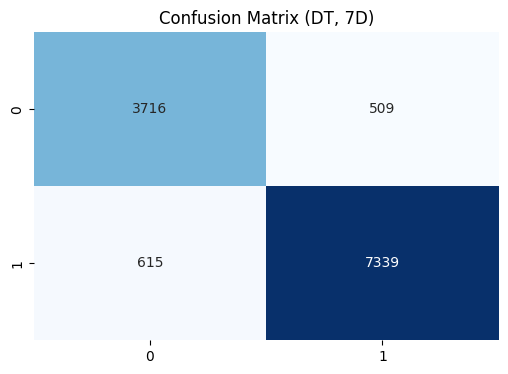

[[3716  509]
 [ 615 7339]]
[1. 1. 1. ... 1. 1. 0.]
Classification Accuracy Score (DT, 7D): 0.91
Classification Precision Score (DT, 7D): 0.94
Classification Recall Score (DT, 7D): 0.92
Classification F1 Score (DT, 7D): 0.93


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


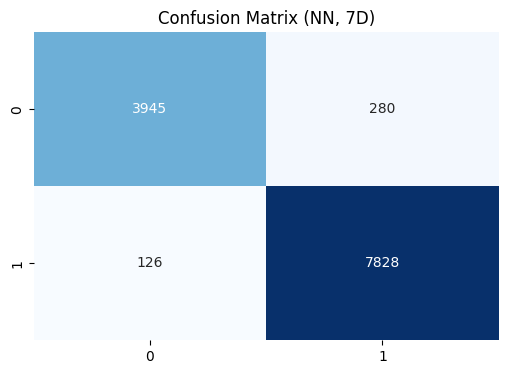

[[3945  280]
 [ 126 7828]]
[1. 1. 1. ... 1. 1. 0.]
Classification Accuracy Score (NN, 7D): 0.97
Classification Precision Score (NN, 7D): 0.97
Classification Recall Score (NN, 7D): 0.98
Classification F1 Score (NN, 7D): 0.97


In [ ]:
#2.2: Classification of 7d
from sklearn.metrics import confusion_matrix


#scaling data (inputs only for classification)
scaler_input = StandardScaler()
scaler_input.fit(input_data_7D) # fit the scaler to the input data
input_data_7D_scaled=scaler_input.transform(input_data_7D) # scale the input training data

#splitting data
seed = 123
input_data_7D_train, input_data_7D_test, output_data_7D_train, output_data_7D_test = train_test_split(input_data_7D_scaled, output_data_7D, train_size=0.75, random_state=seed)

#Support Vector Classifier
svc_model = svm.SVC(kernel='rbf')
svc_model.fit(input_data_7D_train, output_data_7D_train['coilable'])
output_data_7D_test_predict_svc = svc_model.predict(input_data_7D_test)

confusion_svc = confusion_matrix(output_data_7D_test['coilable'], output_data_7D_test_predict_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SVM, 7D)")
plt.show()
print(confusion_svc)

accuracy_7D_svc = accuracy_score(output_data_7D_test['coilable'], output_data_7D_test_predict_svc)
precision_7D_svc = precision_score(output_data_7D_test['coilable'], output_data_7D_test_predict_svc)
recall_7D_svc = recall_score(output_data_7D_test['coilable'], output_data_7D_test_predict_svc)
f1_7D_svc = f1_score(output_data_7D_test['coilable'], output_data_7D_test_predict_svc)
print(output_data_7D_test_predict_svc)
print(f"Classification Accuracy (SVM, 7D): {accuracy_7D_svc:.2f}")
print(f"Classification Precision Score (SVM, 7D): {precision_7D_svc:.2f}")
print(f"Classification Recall Score (SVM, 7D): {recall_7D_svc:.2f}")
print(f"Classification F1 Score (SVM, 7D): {f1_7D_svc:.2f}")

#Decision Tree Classifier
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(input_data_7D_train, output_data_7D_train['coilable'])
output_data_7D_test_predict_tree = tree_model.predict(input_data_7D_test)

accuracy_7D_tree = accuracy_score(output_data_7D_test['coilable'], output_data_7D_test_predict_tree)
precision_7D_tree = precision_score(output_data_7D_test['coilable'], output_data_7D_test_predict_tree)
recall_7D_tree = recall_score(output_data_7D_test['coilable'], output_data_7D_test_predict_tree)
f1_7D_tree = f1_score(output_data_7D_test['coilable'], output_data_7D_test_predict_tree)

confusion_tree = confusion_matrix(output_data_7D_test['coilable'], output_data_7D_test_predict_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (DT, 7D)")
plt.show()
print(confusion_tree)

print(output_data_7D_test_predict_tree)
print(f"Classification Accuracy Score (DT, 7D): {accuracy_7D_tree:.2f}")
print(f"Classification Precision Score (DT, 7D): {precision_7D_tree:.2f}")
print(f"Classification Recall Score (DT, 7D): {recall_7D_tree:.2f}")
print(f"Classification F1 Score (DT, 7D): {f1_7D_tree:.2f}")

#Neural Network Classifier
nn_model = neural_network.MLPClassifier()
nn_model.fit(input_data_7D_train, output_data_7D_train['coilable'])
output_data_7D_test_predict_nn = nn_model.predict(input_data_7D_test)

accuracy_7D_nn = accuracy_score(output_data_7D_test['coilable'], output_data_7D_test_predict_nn)
precision_7D_nn = precision_score(output_data_7D_test['coilable'], output_data_7D_test_predict_nn)
recall_7D_nn = recall_score(output_data_7D_test['coilable'], output_data_7D_test_predict_nn)
f1_7D_nn = f1_score(output_data_7D_test['coilable'], output_data_7D_test_predict_nn)

confusion_nn = confusion_matrix(output_data_7D_test['coilable'], output_data_7D_test_predict_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (NN, 7D)")
plt.show()
print(confusion_nn)
print(output_data_7D_test_predict_nn)
print(f"Classification Accuracy Score (NN, 7D): {accuracy_7D_nn:.2f}")
print(f"Classification Precision Score (NN, 7D): {precision_7D_nn:.2f}")
print(f"Classification Recall Score (NN, 7D): {recall_7D_nn:.2f}")
print(f"Classification F1 Score (NN, 7D): {f1_7D_nn:.2f}")

In [ ]:
#2.2: regression of 7d

# Split the data into training and testing sets
input_data_7D_train, input_data_7D_test, output_data_7D_train, output_data_7D_test = train_test_split(
    input_data_7D_scaled, output_data_7D, test_size=0.2, random_state=42
)

# Scale the output variables
scaler_sigmacrit = StandardScaler()
output_data_7D_train_scaled_sigmacrit = scaler_sigmacrit.fit_transform(
    output_data_7D_train[['sigma_crit']]
)
output_data_7D_test_scaled_sigmacrit = scaler_sigmacrit.transform(
    output_data_7D_test[['sigma_crit']]
)

scaler_energy = StandardScaler()
output_data_7D_train_scaled_energy = scaler_energy.fit_transform(
    output_data_7D_train[['energy']]
)
output_data_7D_test_scaled_energy = scaler_energy.transform(
    output_data_7D_test[['energy']]
)

print('done')


done


In [ ]:
print('1')

# Random Forest Regression for sigma_crit
rf_model_sigmacrit = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the parameters
print('2')
rf_model_sigmacrit.fit(input_data_7D_train, output_data_7D_train_scaled_sigmacrit)
output_data_7D_test_predict_rf_sigmacrit = rf_model_sigmacrit.predict(input_data_7D_test)
print('3')

# Random Forest Regression for energy
rf_model_energy = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the parameters
print('4')

rf_model_energy.fit(input_data_7D_train, output_data_7D_train_scaled_energy)
output_data_7D_test_predict_rf_energy = rf_model_energy.predict(input_data_7D_test)
print('5')



# Inverse transform the scaled predictions to get the original scale for Random Forest
output_data_7D_test_predict_rf_sigmacrit_original_scale = scaler_sigmacrit.inverse_transform(
    output_data_7D_test_predict_rf_sigmacrit.reshape(-1, 1)
)

output_data_7D_test_predict_rf_energy_original_scale = scaler_energy.inverse_transform(
    output_data_7D_test_predict_rf_energy.reshape(-1, 1)
)


# Calculate metrics on the original scale for Random Forest
mse_value_7D_rf_sigmacrit = mean_squared_error(
    output_data_7D_test[['sigma_crit']], output_data_7D_test_predict_rf_sigmacrit_original_scale
)
r2_value_7D_rf_sigmacrit = r2_score(
    output_data_7D_test[['sigma_crit']], output_data_7D_test_predict_rf_sigmacrit_original_scale
)

mse_value_7D_rf_energy = mean_squared_error(
    output_data_7D_test[['energy']], output_data_7D_test_predict_rf_energy_original_scale
)
r2_value_7D_rf_energy = r2_score(
    output_data_7D_test[['energy']], output_data_7D_test_predict_rf_energy_original_scale
)

print(f"Regression MSE (Random Forest, sigma_crit, 7D): {mse_value_7D_rf_sigmacrit:.2f}")
print(f"Regression R2 (Random Forest, sigma_crit, 7D): {r2_value_7D_rf_sigmacrit:.2f}")
print(f"Regression MSE (Random Forest, energy, 7D): {mse_value_7D_rf_energy:.2f}")
print(f"Regression R2 (Random Forest, energy, 7D): {r2_value_7D_rf_energy:.2f}")

1
2


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


3
4


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


5
Regression MSE (Random Forest, sigma_crit, 7D): 54.21
Regression R2 (Random Forest, sigma_crit, 7D): 0.93
Regression MSE (Random Forest, energy, 7D): 76457.67
Regression R2 (Random Forest, energy, 7D): 0.59


In [ ]:
from sklearn.linear_model import Ridge


print('1')

# Ridge Regression for sigma_crit
ridge_model_sigmacrit = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model_sigmacrit.fit(input_data_7D_train, output_data_7D_train_scaled_sigmacrit)
output_data_7D_test_predict_ridge_sigmacrit = ridge_model_sigmacrit.predict(input_data_7D_test)
print('2')

# Ridge Regression for energy
ridge_model_energy = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model_energy.fit(input_data_7D_train, output_data_7D_train_scaled_energy)
output_data_7D_test_predict_ridge_energy = ridge_model_energy.predict(input_data_7D_test)
print('3')

# Inverse transform the scaled predictions to get the original scale for Ridge
output_data_7D_test_predict_ridge_sigmacrit_original_scale = scaler_sigmacrit.inverse_transform(
    output_data_7D_test_predict_ridge_sigmacrit.reshape(-1, 1)
)

output_data_7D_test_predict_ridge_energy_original_scale = scaler_energy.inverse_transform(
    output_data_7D_test_predict_ridge_energy.reshape(-1, 1)
)

# Calculate metrics on the original scale for Ridge
mse_value_7D_ridge_sigmacrit = mean_squared_error(
    output_data_7D_test[['sigma_crit']], output_data_7D_test_predict_ridge_sigmacrit_original_scale
)
r2_value_7D_ridge_sigmacrit = r2_score(
    output_data_7D_test[['sigma_crit']], output_data_7D_test_predict_ridge_sigmacrit_original_scale
)

mse_value_7D_ridge_energy = mean_squared_error(
    output_data_7D_test[['energy']], output_data_7D_test_predict_ridge_energy_original_scale
)
r2_value_7D_ridge_energy = r2_score(
    output_data_7D_test[['energy']], output_data_7D_test_predict_ridge_energy_original_scale
)

print(f"Regression MSE (Ridge, sigma_crit, 7D): {mse_value_7D_ridge_sigmacrit:.2f}")
print(f"Regression R2 (Ridge, sigma_crit, 7D): {r2_value_7D_ridge_sigmacrit:.2f}")
print(f"Regression MSE (Ridge, energy, 7D): {mse_value_7D_ridge_energy:.2f}")
print(f"Regression R2 (Ridge, energy, 7D): {r2_value_7D_ridge_energy:.2f}")


1
2
3
Regression MSE (Ridge, sigma_crit, 7D): 405.06
Regression R2 (Ridge, sigma_crit, 7D): 0.50
Regression MSE (Ridge, energy, 7D): 135987.31
Regression R2 (Ridge, energy, 7D): 0.28


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define the neural network model
mlp_model_sigmacrit = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model_energy = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the neural network model for sigma_crit
mlp_model_sigmacrit.fit(input_data_7D_train, output_data_7D_train_scaled_sigmacrit)
output_data_7D_test_predict_mlp_sigmacrit = mlp_model_sigmacrit.predict(input_data_7D_test)

# Fit the neural network model for energy
mlp_model_energy.fit(input_data_7D_train, output_data_7D_train_scaled_energy)
output_data_7D_test_predict_mlp_energy = mlp_model_energy.predict(input_data_7D_test)

# Inverse transform the scaled predictions to get the original scale for MLP
output_data_7D_test_predict_mlp_sigmacrit_original_scale = scaler_sigmacrit.inverse_transform(
    output_data_7D_test_predict_mlp_sigmacrit.reshape(-1, 1)
)

output_data_7D_test_predict_mlp_energy_original_scale = scaler_energy.inverse_transform(
    output_data_7D_test_predict_mlp_energy.reshape(-1, 1)
)

# Calculate metrics on the original scale for MLP
mse_value_7D_mlp_sigmacrit = mean_squared_error(
    output_data_7D_test[['sigma_crit']], output_data_7D_test_predict_mlp_sigmacrit_original_scale
)
r2_value_7D_mlp_sigmacrit = r2_score(
    output_data_7D_test[['sigma_crit']], output_data_7D_test_predict_mlp_sigmacrit_original_scale
)

mse_value_7D_mlp_energy = mean_squared_error(
    output_data_7D_test[['energy']], output_data_7D_test_predict_mlp_energy_original_scale
)
r2_value_7D_mlp_energy = r2_score(
    output_data_7D_test[['energy']], output_data_7D_test_predict_mlp_energy_original_scale
)

print(f"Regression MSE (NN, sigma_crit, 7D): {mse_value_7D_mlp_sigmacrit:.2f}")
print(f"Regression R2 (NN, sigma_crit, 7D): {r2_value_7D_mlp_sigmacrit:.2f}")
print(f"Regression MSE (NN, energy, 7D): {mse_value_7D_mlp_energy:.2f}")
print(f"Regression R2 (NN, energy, 7D): {r2_value_7D_mlp_energy:.2f}")


/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cfd-user/mambaforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regression MSE (NN, sigma_crit, 7D): 59.53
Regression R2 (NN, sigma_crit, 7D): 0.93
Regression MSE (NN, energy, 7D): 77305.29
Regression R2 (NN, energy, 7D): 0.59


<ipython-input-14-9b231039c4da>:30: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  accuracyTable.set_axis(cValues, axis=1, inplace=True)


Accuracy Table (ntrain for rows, C values for columns)
         0.5       1.0       10.0      20.0      50.0
50   0.720000  0.760000  0.740000  0.780000  0.780000
100  0.780000  0.820000  0.780000  0.730000  0.730000
250  0.819672  0.840164  0.823770  0.819672  0.823770
500  0.836066  0.840164  0.848361  0.852459  0.860656
960  0.836066  0.844262  0.864754  0.864754  0.868852


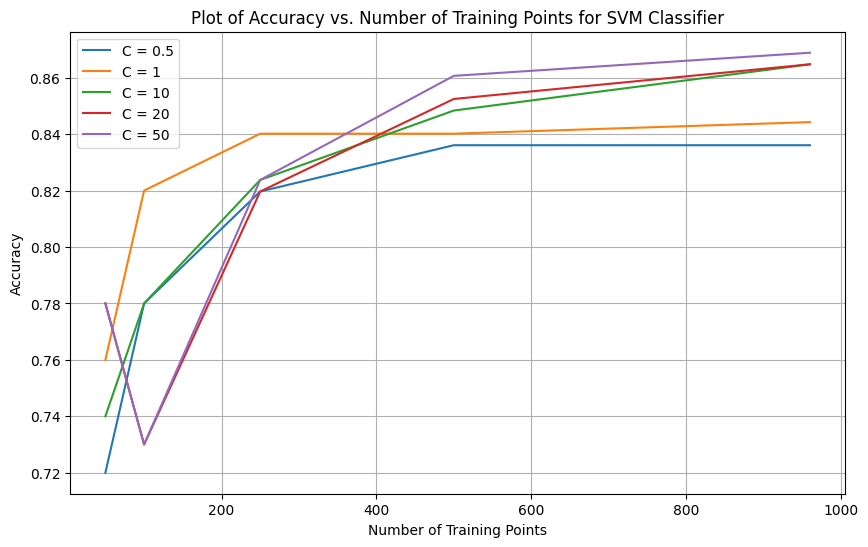

In [ ]:
#3.1: Classification based on number of training points and C parameter
def classificationErrorReport(nPoints, X_train, X_test, Y_train, Y_test, CValue):

  newX_train = X_train[0:nPoints] #truncating data according to number of points
  newY_train = Y_train[0:nPoints]
  newX_test = X_test[0:nPoints]
  newY_test = Y_test[0:nPoints]

  #model
  svc_model = svm.SVC(C=float(CValue))
  svc_model.fit(newX_train,newY_train['coilable'])
  Y_predict_svc = svc_model.predict(newX_test)

  accuracy_3D_svc = accuracy_score(newY_test['coilable'], Y_predict_svc)

  return accuracy_3D_svc

nPointsVector = [50,100,250,500,960]
cValues = [0.5,1,10,20,50]

accuracyMatrix = np.zeros((len(nPointsVector), len(cValues)))

#looping through Gaussian processes with points and vectors
for p, poin in enumerate(nPointsVector):
  for c, cval in enumerate(cValues):
    accuracyMatrix[p,c] = classificationErrorReport(poin,input_data_3D_train, input_data_3D_test, output_data_3D_train, output_data_3D_test,cval)

accuracyTable = pd.DataFrame(accuracyMatrix)
accuracyTable.set_index(pd.Index(nPointsVector), inplace=True)
accuracyTable.set_axis(cValues, axis=1, inplace=True)

print("Accuracy Table (ntrain for rows, C values for columns)")
print (accuracyTable)

accuracy_data = accuracyTable.to_numpy()
accuracy_data_transposed = accuracy_data.T

# Plot lines for each C value
plt.figure(figsize=(10, 6))
for i, c_value in enumerate(cValues):
    plt.plot(nPointsVector, accuracy_data_transposed[i], label=f'C = {c_value}')

plt.title('Plot of Accuracy vs. Number of Training Points for SVM Classifier')
plt.xlabel('Number of Training Points')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)



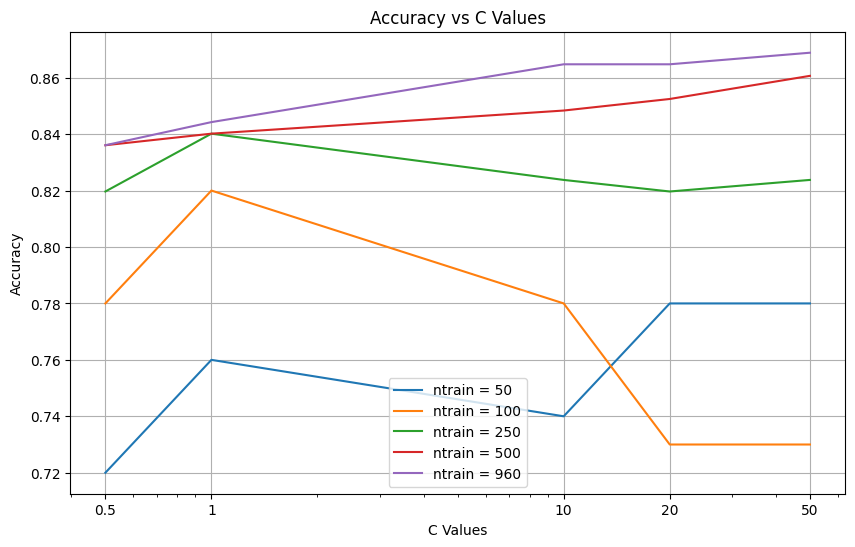

In [ ]:
plt.figure(figsize=(10, 6))
for i, ntrain_value in enumerate(nPointsVector):
    plt.plot(cValues, accuracy_data[i, :], label=f'ntrain = {ntrain_value}')

plt.title('Accuracy vs C Values')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use log scale for better visualization with large C values
plt.xticks(cValues, labels=[str(c) for c in cValues])
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
<ipython-input-30-ef781403c512>:38: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and wil

R-Squared Values for sigma_crit (ntrain for rows, nu values for columns)
          0.5       1.5       2.5
50   0.850755  0.875023  0.875552
100  0.833730  0.774405  0.706683
250  0.930247  0.916754  0.904052
500  0.943006  0.930772 -0.720552
960  0.946427  0.936268 -0.720552
MSE Values for sigma_crit (ntrain for rows, nu values for columns)
           0.5        1.5         2.5
50   63.579482  53.241176   53.015911
100  55.169524  74.854030   97.324476
250  26.189563  31.255453   36.024425
500  21.398766  25.992428  645.997824
960  20.114446  23.928715  645.997824
R-Squared Values for energy (ntrain for rows, nu values for columns)
          0.5       1.5       2.5
50   0.875735  0.899176  0.898019
100  0.866535  0.845910  0.804654
250  0.950802  0.947075  0.939753
500  0.962246  0.957204  0.948467
960  0.964627  0.957731 -0.689620
MSE Values for energy (ntrain for rows, nu values for columns)
           0.5        1.5         2.5
50   18.717626  15.186728   15.361052
100  15.809431  

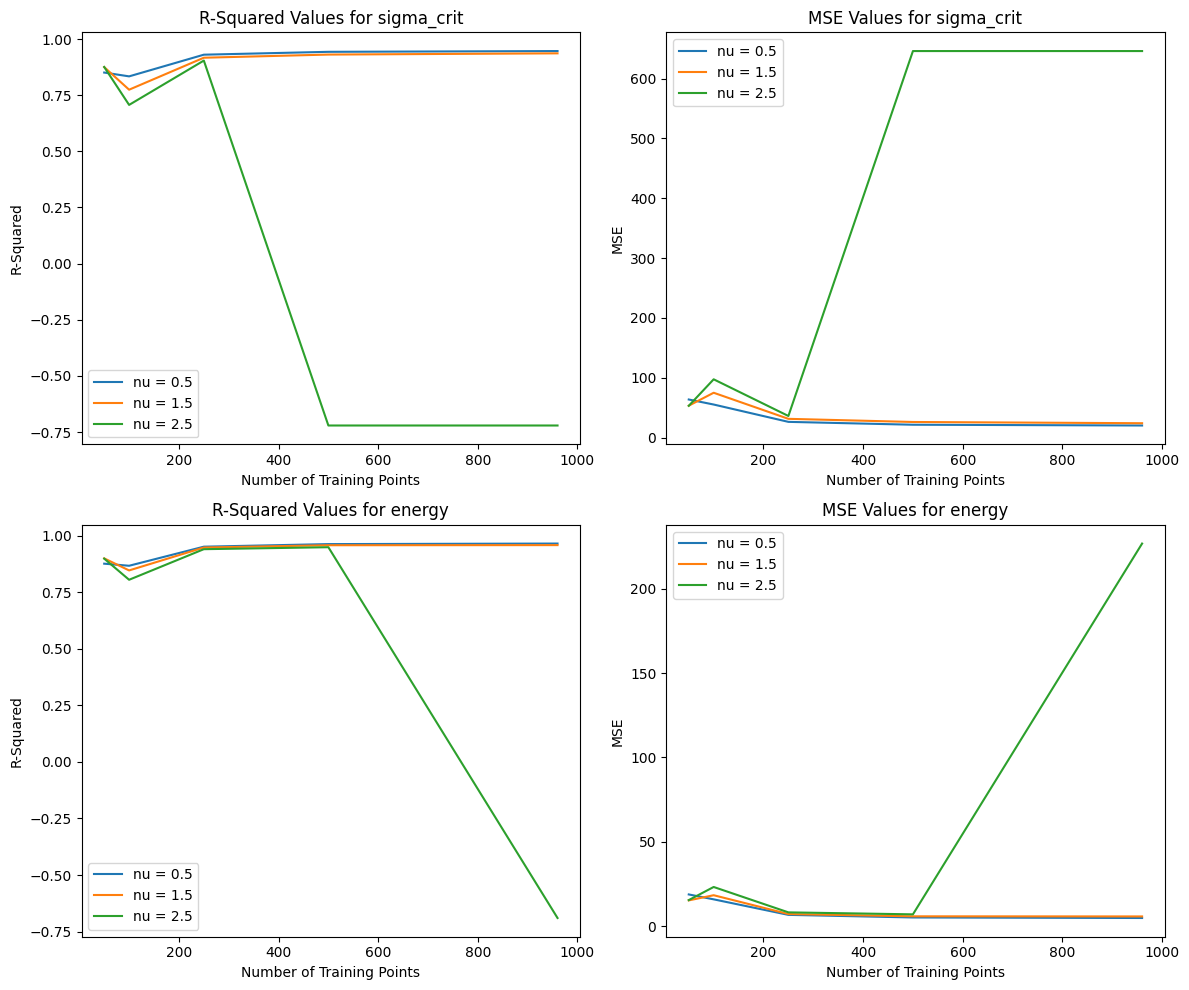

In [ ]:
def regressionErrorReport(nPoints, X_train, X_test, Y_train, Y_test, smoothnessParameter):

  newX_train = X_train[0:nPoints] #truncating data according to number of points
  newY_train = Y_train[0:nPoints]
  newX_test = X_test[0:nPoints]
  newY_test = Y_test[0:nPoints]

  #model
  gp_model_sigmacrit = gaussian_process.GaussianProcessRegressor(kernel=Matern(nu = float(smoothnessParameter)))
  gp_model_sigmacrit.fit(newX_train,newY_train['sigma_crit'])
  Y_predict_sigmacrit_svc = gp_model_sigmacrit.predict(newX_test)

  gp_model_energy = gaussian_process.GaussianProcessRegressor(kernel=Matern(nu = float(smoothnessParameter)))
  gp_model_energy.fit(newX_train,newY_train['energy'])
  Y_predict_energy_svc = gp_model_energy.predict(newX_test)

  mseSigmacrit = mean_squared_error(newY_test['sigma_crit'], Y_predict_sigmacrit_svc)
  r2Sigmacrit = r2_score(newY_test['sigma_crit'], Y_predict_sigmacrit_svc)
  mseEnergy = mean_squared_error(newY_test['energy'], Y_predict_energy_svc)
  r2Energy = r2_score(newY_test['energy'], Y_predict_energy_svc)
  return r2Sigmacrit, mseSigmacrit, r2Energy, mseEnergy

nPointsVector = [50,100,250,500,960]
nuValues = [0.5, 1.5, 2.5]

r2MatrixSigmacrit = np.zeros((len(nPointsVector), len(nuValues)))
mseMatrixSigmacrit = np.zeros((len(nPointsVector), len(nuValues)))
r2MatrixEnergy = np.zeros((len(nPointsVector), len(nuValues)))
mseMatrixEnergy = np.zeros((len(nPointsVector), len(nuValues)))

#looping through Gaussian processes with points and vectors
for p, poin in enumerate(nPointsVector):
  for nu, nuval in enumerate(nuValues):
    r2MatrixSigmacrit[p,nu],mseMatrixSigmacrit[p,nu],r2MatrixEnergy[p,nu],mseMatrixEnergy[p,nu] = regressionErrorReport(poin,input_data_3D_train, input_data_3D_test, output_data_3D_train, output_data_3D_test,nuval)

r2SigmacritTable = pd.DataFrame(r2MatrixSigmacrit)
r2SigmacritTable.set_index(pd.Index(nPointsVector), inplace=True)
r2SigmacritTable.set_axis(nuValues, axis=1, inplace=True)
print("R-Squared Values for sigma_crit (ntrain for rows, nu values for columns)")
print (r2SigmacritTable)

mseSigmacritTable = pd.DataFrame(mseMatrixSigmacrit)
mseSigmacritTable.set_index(pd.Index(nPointsVector), inplace=True)
mseSigmacritTable.set_axis(nuValues, axis=1, inplace=True)
print("MSE Values for sigma_crit (ntrain for rows, nu values for columns)")
print (mseSigmacritTable)

r2EnergyTable = pd.DataFrame(r2MatrixEnergy)
r2EnergyTable.set_index(pd.Index(nPointsVector), inplace=True)
r2EnergyTable.set_axis(nuValues, axis=1, inplace=True)
print("R-Squared Values for energy (ntrain for rows, nu values for columns)")
print (r2EnergyTable)

mseEnergyTable = pd.DataFrame(mseMatrixEnergy)
mseEnergyTable.set_index(pd.Index(nPointsVector), inplace=True)
mseEnergyTable.set_axis(nuValues, axis=1, inplace=True)
print("MSE Values for energy (ntrain for rows, nu values for columns)")
print (mseEnergyTable)

r2SigmacritTablePlot = r2SigmacritTable.to_numpy()
mseSigmacritTablePlot = mseSigmacritTable.to_numpy()
r2EnergyTablePlot = r2EnergyTable.to_numpy()
mseEnergyTablePlot = mseEnergyTable.to_numpy()

# Plotting subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Subplot 1: R-Squared Values for sigma_crit
for i, nu_value in enumerate(nuValues):
    axes[0, 0].plot(nPointsVector, r2SigmacritTablePlot[:, i], label=f'nu = {nu_value}')
axes[0, 0].set_title('R-Squared Values for sigma_crit')
axes[0, 0].set_xlabel('Number of Training Points')
axes[0, 0].set_ylabel('R-Squared')
axes[0, 0].legend()

# Subplot 2: MSE Values for sigma_crit
for i, nu_value in enumerate(nuValues):
    axes[0, 1].plot(nPointsVector, mseSigmacritTablePlot[:, i], label=f'nu = {nu_value}')
axes[0, 1].set_title('MSE Values for sigma_crit')
axes[0, 1].set_xlabel('Number of Training Points')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].legend()

# Subplot 3: R-Squared Values for energy
for i, nu_value in enumerate(nuValues):
    axes[1, 0].plot(nPointsVector, r2EnergyTablePlot[:, i], label=f'nu = {nu_value}')
axes[1, 0].set_title('R-Squared Values for energy')
axes[1, 0].set_xlabel('Number of Training Points')
axes[1, 0].set_ylabel('R-Squared')
axes[1, 0].legend()

# Subplot 4: MSE Values for energy
for i, nu_value in enumerate(nuValues):
    axes[1, 1].plot(nPointsVector, mseEnergyTablePlot[:, i], label=f'nu = {nu_value}')
axes[1, 1].set_title('MSE Values for energy')
axes[1, 1].set_xlabel('Number of Training Points')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


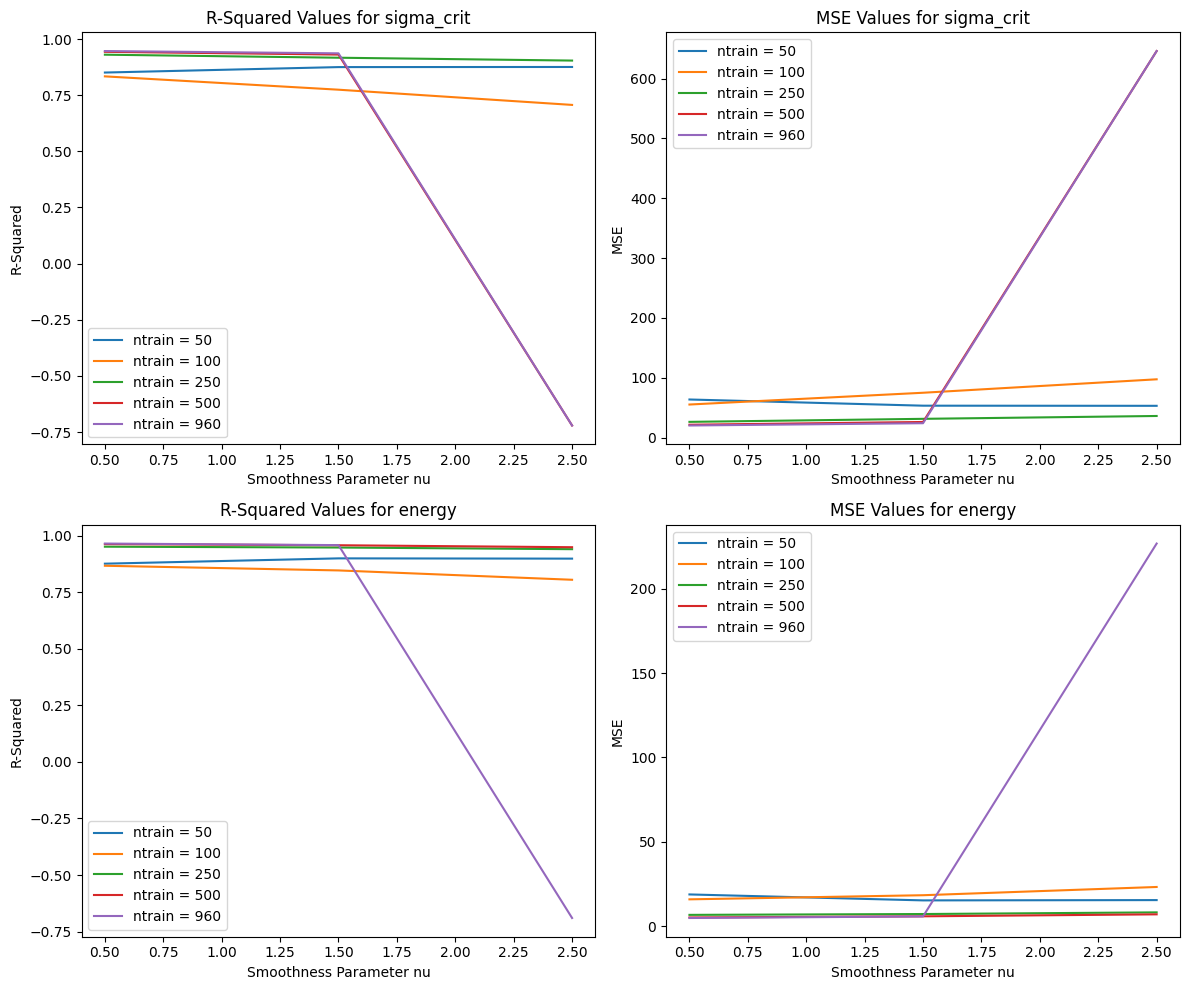

In [ ]:
# Plotting subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Subplot 1: R-Squared Values for sigma_crit
for i, ntrain_value in enumerate(nPointsVector):
    axes[0, 0].plot(nuValues, r2SigmacritTablePlot[i, :], label=f'ntrain = {ntrain_value}')
axes[0, 0].set_title('R-Squared Values for sigma_crit')
axes[0, 0].set_xlabel('Smoothness Parameter nu')
axes[0, 0].set_ylabel('R-Squared')
axes[0, 0].legend()

# Subplot 2: MSE Values for sigma_crit
for i, ntrain_value in enumerate(nPointsVector):
    axes[0, 1].plot(nuValues, mseSigmacritTablePlot[i, :], label=f'ntrain = {ntrain_value}')
axes[0, 1].set_title('MSE Values for sigma_crit')
axes[0, 1].set_xlabel('Smoothness Parameter nu')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].legend()

# Subplot 3: R-Squared Values for energy
for i, ntrain_value in enumerate(nPointsVector):
    axes[1, 0].plot(nuValues, r2EnergyTablePlot[i, :], label=f'ntrain = {ntrain_value}')
axes[1, 0].set_title('R-Squared Values for energy')
axes[1, 0].set_xlabel('Smoothness Parameter nu')
axes[1, 0].set_ylabel('R-Squared')
axes[1, 0].legend()

# Subplot 4: MSE Values for energy
for i, ntrain_value in enumerate(nPointsVector):
    axes[1, 1].plot(nuValues, mseEnergyTablePlot[i, :], label=f'ntrain = {ntrain_value}')
axes[1, 1].set_title('MSE Values for energy')
axes[1, 1].set_xlabel('Smoothness Parameter nu')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
#4.1

from sklearn import svm
from sklearn import gaussian_process
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared, ConstantKernel, WhiteKernel


#scaling data (inputs only for classification)
scaler_input = StandardScaler()
scaler_input.fit(input_data_3D) # fit the scaler to the input data
input_data_3D_scaled=scaler_input.transform(input_data_3D) # scale the input training data

#splitting data
seed = 123
input_data_3D_train, input_data_3D_test, output_data_3D_train, output_data_3D_test = train_test_split(input_data_3D_scaled, output_data_3D, train_size=0.75, random_state=seed)

#Support Vector Classifier
svc_model = svm.SVC(C = 20, kernel='rbf')
svc_model.fit(input_data_3D_train, output_data_3D_train['coilable'])
output_data_3D_test_predict_svc = svc_model.predict(input_data_3D_scaled)
output_data_3D_test_predict_svc_df = pd.DataFrame({'coilable':output_data_3D_test_predict_svc})
full_data_3D_predict_svc = full_data_3D
full_data_3D_predict_svc['coilable'] = output_data_3D_test_predict_svc_df['coilable']

filtered_df = full_data_3D_predict_svc[full_data_3D_predict_svc['coilable'] == 1]
maxSigmaCrit = filtered_df.loc[filtered_df['sigma_crit'].idxmax()]
maxEnergy = filtered_df.loc[filtered_df['energy'].idxmax()]
print('Point with maximum sigma_crit')
print(maxSigmaCrit)
print('Point with maximum energy')
print(maxEnergy)



Point with maximum sigma_crit
ratio_pitch            0.538086
ratio_d                0.042004
ratio_top_diameter     0.753125
coilable               1.000000
sigma_crit            18.246796
energy                10.942924
Name: 217, dtype: float64
Point with maximum energy
ratio_pitch            0.538086
ratio_d                0.042004
ratio_top_diameter     0.753125
coilable               1.000000
sigma_crit            18.246796
energy                10.942924
Name: 217, dtype: float64


In [ ]:
from scipy.optimize import minimize

#scaling outputs
scaler_sigmacrit = StandardScaler()
output_data_3D_train_scaled_sigmacrit = scaler_sigmacrit.fit_transform(output_data_3D_train[['sigma_crit']])
output_data_3D_test_scaled_sigmacrit = scaler_sigmacrit.transform(output_data_3D_test[['sigma_crit']])
scaler_energy = StandardScaler()
output_data_3D_train_scaled_energy = scaler_energy.fit_transform(output_data_3D_train[['energy']])
output_data_3D_test_scaled_energy = scaler_energy.transform(output_data_3D_test[['energy']])

#Gaussian Process Regression
gp_model_sigmacrit = gaussian_process.GaussianProcessRegressor(kernel=Matern(nu = 0.5))
gp_model_sigmacrit.fit(input_data_3D_train, output_data_3D_train_scaled_sigmacrit)
gp_model_energy = gaussian_process.GaussianProcessRegressor(kernel=Matern(nu = 0.5))
gp_model_energy.fit(input_data_3D_train, output_data_3D_train_scaled_energy)


# Define the objective functions for optimization
def objective_critical_buckling_stress(x):
    x = np.array(x).reshape(-1, 3)
    classifiedValue = svc_model.predict(x)
    if classifiedValue == 2.:
      returnValue = -gp_model_sigmacrit.predict(x)
    else:
      returnValue = 1000
    return returnValue

def objective_energy_absorption(x):
    x = np.array(x).reshape(-1, 3)
    classifiedValue = svc_model.predict(x)
    if classifiedValue == 2.:
      returnValue = -gp_model_energy.predict(x)
    else:
      returnValue = 1000
    return returnValue

# Define the bounds for optimization
bounds = [(min(input_data_3D_scaled[:, i]), max(input_data_3D_scaled[:, i])) for i in range(input_data_3D_scaled.shape[1])]

result_nelder_critical = minimize(objective_critical_buckling_stress, x0=np.mean(bounds, axis=1), bounds=bounds, method='Nelder-Mead')
value_critical_nelder = np.array(-result_nelder_critical.fun)
value_critical_nelder_rescaled = scaler_sigmacrit.inverse_transform(value_critical_nelder.reshape(-1,1))
print("Maximum Critical Buckling Stress - Nelder-Mead:", value_critical_nelder_rescaled)
optimal_point_critical_nelder = np.array(result_nelder_critical.x)
optimal_point_critical_nelder_rescaled = scaler_input.inverse_transform(optimal_point_critical_nelder.reshape(-1,3))
print("Optimal Parameters for Maximum Critical Buckling Stress - Nelder-Mead:", optimal_point_critical_nelder_rescaled)

result_nelder_energy = minimize(objective_energy_absorption, x0=np.mean(bounds, axis=1), bounds=bounds, method='Nelder-Mead')
value_energy_nelder = np.array(-result_nelder_energy.fun)
value_energy_nelder_rescaled = scaler_energy.inverse_transform(value_energy_nelder.reshape(-1,1))
print("Maximum Absorption Energy - Nelder-Mead:", value_energy_nelder_rescaled)
optimal_point_energy_nelder = np.array(result_nelder_energy.x)
optimal_point_energy_nelder_rescaled = scaler_input.inverse_transform(optimal_point_energy_nelder.reshape(-1,3))
print("Optimal Parameters for Maximum Absorption Energy - Nelder-Mead:", optimal_point_energy_nelder_rescaled)


result_lbfgs_critical = minimize(objective_critical_buckling_stress, x0=np.mean(bounds, axis=1), bounds=bounds, method='L-BFGS-B')
value_critical_lbfgs = np.array(-result_lbfgs_critical.fun)
value_critical_lbfgs_rescaled = scaler_sigmacrit.inverse_transform(value_critical_lbfgs.reshape(-1,1))
print("Maximum Critical Buckling Stress - L-BFGS-B:", value_critical_lbfgs_rescaled)
optimal_point_critical_lbfgs = np.array(result_lbfgs_critical.x)
optimal_point_critical_lbfgs_rescaled = scaler_input.inverse_transform(optimal_point_critical_lbfgs.reshape(-1,3))
print("Optimal Parameters for Maximum Critical Buckling Stress - L-BFGS-B:", optimal_point_critical_lbfgs_rescaled)

result_lbfgs_energy = minimize(objective_energy_absorption, x0=np.mean(bounds, axis=1), bounds=bounds, method='L-BFGS-B')
value_energy_lbfgs = np.array(-result_lbfgs_energy.fun)
value_energy_lbfgs_rescaled = scaler_energy.inverse_transform(value_energy_lbfgs.reshape(-1,1))
print("Maximum Absorption Energy - L-BFGS-B:", value_energy_lbfgs_rescaled)
optimal_point_energy_lbfgs = np.array(result_lbfgs_energy.x)
optimal_point_energy_lbfgs_rescaled = scaler_input.inverse_transform(optimal_point_energy_lbfgs.reshape(-1,3))
print("Optimal Parameters for Maximum Absorption Energy - L-BFGS-B:", optimal_point_energy_lbfgs_rescaled)


result_TNC_critical = minimize(objective_critical_buckling_stress, x0=np.mean(bounds, axis=1), bounds=bounds, method='TNC')
value_critical_TNC = np.array(-result_TNC_critical.fun)
value_critical_TNC_rescaled = scaler_sigmacrit.inverse_transform(value_critical_TNC.reshape(-1,1))
print("Maximum Critical Buckling Stress - TNC:", value_critical_TNC_rescaled)
optimal_point_critical_TNC = np.array(result_TNC_critical.x)
optimal_point_critical_TNC_rescaled = scaler_input.inverse_transform(optimal_point_critical_TNC.reshape(-1,3))
print("Optimal Parameters for Maximum Critical Buckling Stress - TNC:", optimal_point_critical_TNC_rescaled)

result_TNC_energy = minimize(objective_energy_absorption, x0=np.mean(bounds, axis=1), bounds=bounds, method='TNC')
value_energy_TNC = np.array(-result_TNC_energy.fun)
value_energy_TNC_rescaled = scaler_energy.inverse_transform(value_energy_TNC.reshape(-1,1))
print("Maximum Absorption Energy - TNC:", value_energy_TNC_rescaled)
optimal_point_energy_TNC = np.array(result_TNC_energy.x)
optimal_point_energy_TNC_rescaled = scaler_input.inverse_transform(optimal_point_energy_TNC.reshape(-1,3))
print("Optimal Parameters for Maximum Absorption Energy - TNC:", optimal_point_energy_TNC_rescaled)





Maximum Critical Buckling Stress - Nelder-Mead: [[17.4150232]]
Optimal Parameters for Maximum Critical Buckling Stress - Nelder-Mead: [[0.87500982 0.03850069 0.40000637]]
Maximum Absorption Energy - Nelder-Mead: [[7.29276827]]
Optimal Parameters for Maximum Absorption Energy - Nelder-Mead: [[0.87501374 0.03850114 0.39999554]]
Maximum Critical Buckling Stress - L-BFGS-B: [[17.41738196]]
Optimal Parameters for Maximum Critical Buckling Stress - L-BFGS-B: [[0.875  0.0385 0.4   ]]
Maximum Absorption Energy - L-BFGS-B: [[55.52615479]]
Optimal Parameters for Maximum Absorption Energy - L-BFGS-B: [[0.68975519 0.07286523 0.66724059]]
Maximum Critical Buckling Stress - TNC: [[17.41592996]]
Optimal Parameters for Maximum Critical Buckling Stress - TNC: [[0.87500518 0.03850064 0.39999715]]
Maximum Absorption Energy - TNC: [[7.29027549]]
Optimal Parameters for Maximum Absorption Energy - TNC: [[0.87504942 0.03849964 0.39996528]]
